## Import Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
from collections import defaultdict

In [2]:
#To display all columns in Jupyter Notebooks
pd.set_option('display.max_columns', 500)

## Retrieve data from Database

In [3]:
#Import MongoClient
from pymongo import MongoClient

#Create a MongoClient to run the MongoDB instance
client = MongoClient('localhost', 27017)

In [4]:
#Connect to existing datbase
db = client.NHANES_Q

In [5]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'NHANES_Q')

In [6]:
#Look at existing collections
col = db.list_collection_names()
col.sort()
col

['HU', 'HU_no_ohe']

In [7]:
#Collections
hu = db.HU
hu_no = db.HU_no_ohe

In [8]:
#Create dataframes from database collections
df_hu = pd.DataFrame(list(hu.find()))
df_hu_no = pd.DataFrame(list(hu_no.find()))

In [9]:
#Variable Declarations
df = df_hu.copy()
df_no = df_hu_no.copy()
label = 'HUQ050'
labeldescr = 'Received Healthcare in Past Year (0-Yes, 1-No)'

## Reorder columns

### Reorder OHE dataframe

In [10]:
#Get a list of columns
cols = list(df)

#Move '_id' column to head of list using dex, pop and insert
cols.insert(0, cols.pop(cols.index('_id')))

#Move 'Year' column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index('Year')))

#Move 'MEC18YR' column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index('MEC18YR')))

#Move 'DRX18YR' column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index('DRX18YR')))

#Move label column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index(label)))

In [11]:
#Reorder dataframe
df = df.loc[:, cols]
df.head()

,_id,BMXBMI,BMXHT,BMXWAIST,BMXWT,DIQ010_2_0,DIQ010_3_0,DMDBORN4_2_0,DMDCITZN_2_0,DMDHHSIZ,DMDHREDU,DRD320GW,DRDTSODI,DRXTALCO,DRXTCAFF,DRXTCALC,DRXTCARB,DRXTCHOL,DRXTCOPP,DRXTFIBE,DRXTIRON,DRXTKCAL,DRXTMAGN,DRXTPHOS,DRXTPOTA,DRXTPROT,DRXTTFAT,DRXTVARE,DRXTVB1,DRXTVB12,DRXTVB2,DRXTVB6,DRXTVC,DRXTZINC,HID010_2_0,HUQ010,HUQ020_2_0,HUQ020_3_0,HUQ030_2_0,HUQ030_3_0,HUQ070_2_0,INDFMINC,MCQ010_2_0,RIAGENDR_2_0,RIDAGEYR,RIDRETH1_2_0,RIDRETH1_3_0,RIDRETH1_4_0,RIDRETH1_5_0,SMD410_2_0,Year,MEC18YR,DRX18YR,HUQ050
0,1.0,14.90,91.6,45.7,12.5,1,0,0,0,3.0,3.0,2.433800e+02,1621.35,5.397605e-79,5.397605e-79,541.30,250.36,46.55,0.41,7.41,12.18,1358.88,126.80,503.75,1387.70,31.96,27.24,604.33,1.50,2.42,1.55,1.43,220.64,4.69,0,1.0,0,1,0,0,0,3.0,1,1,2.0,0,0,1,0,1,0,990.268132,1348.028592,0.0
1,2.0,24.90,174.0,98.0,75.4,1,0,0,0,1.0,5.0,5.397605e-79,5710.03,5.397605e-79,5.304500e+02,925.37,350.37,313.95,2.08,36.99,37.29,2463.00,502.25,1974.57,4672.48,123.16,71.95,923.91,2.11,8.68,3.25,2.90,119.12,41.61,0,2.0,1,0,0,0,0,8.0,1,0,77.0,0,1,0,0,1,0,3408.044382,3315.985398,0.0
2,3.0,17.63,136.6,64.7,32.9,1,0,1,1,4.0,4.0,5.310000e+02,1676.51,5.397605e-79,3.540000e+01,415.27,233.63,86.22,0.85,11.16,9.78,1517.69,172.58,674.82,1487.16,40.19,49.94,885.72,1.21,1.59,1.43,1.37,57.95,5.65,0,1.0,0,0,0,0,1,6.0,1,1,10.0,0,1,0,0,0,0,4724.103694,3525.877253,0.0
3,5.0,29.10,178.3,99.9,92.5,1,0,0,0,3.0,4.0,1.298000e+03,3756.36,3.456000e+01,5.397605e-79,1626.38,253.98,180.57,1.95,17.28,27.22,2658.14,367.72,1811.55,3743.15,97.13,114.52,1298.44,2.62,6.66,3.05,2.92,112.19,10.17,0,2.0,0,1,0,0,1,11.0,1,0,49.0,0,1,0,0,1,0,10219.103963,13105.246918,0.0
4,6.0,22.56,162.0,81.6,59.2,1,0,0,0,2.0,4.0,1.711000e+03,949.52,5.397605e-79,2.672300e+02,382.23,202.11,38.45,0.81,6.24,10.59,1113.66,136.78,571.68,1684.50,24.63,25.15,389.86,0.72,1.67,0.90,0.97,37.31,6.83,0,2.0,0,1,0,0,1,3.0,1,1,19.0,0,0,0,1,1,0,4074.958535,8884.256881,0.0


### Reorder non-OHE dataframe

In [12]:
#Get a list of columns
cols = list(df_no)

#Move '_id' column to head of list using dex, pop and insert
cols.insert(0, cols.pop(cols.index('_id')))

#Move 'Year' column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index('Year')))

#Move 'MEC18YR' column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index('MEC18YR')))

#Move 'DRX18YR' column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index('DRX18YR')))

#Move label column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index(label)))

In [13]:
#Reorder dataframe
df_no = df_no.loc[:, cols]
df_no.head()

,_id,BMXBMI,BMXHT,BMXWAIST,BMXWT,DIQ010,DMDBORN4,DMDCITZN,DMDHHSIZ,DMDHREDU,DRD320GW,DRDTSODI,DRXTALCO,DRXTCAFF,DRXTCALC,DRXTCARB,DRXTCHOL,DRXTCOPP,DRXTFIBE,DRXTIRON,DRXTKCAL,DRXTMAGN,DRXTPHOS,DRXTPOTA,DRXTPROT,DRXTTFAT,DRXTVARE,DRXTVB1,DRXTVB12,DRXTVB2,DRXTVB6,DRXTVC,DRXTZINC,HID010,HUQ010,HUQ020,HUQ030,HUQ070,INDFMINC,MCQ010,RIAGENDR,RIDAGEYR,RIDRETH1,SMD410,Year,MEC18YR,DRX18YR,HUQ050
0,1.0,14.90,91.6,45.7,12.5,2.0,1.0,1.0,3.0,3.0,2.433800e+02,1621.35,5.397605e-79,5.397605e-79,541.30,250.36,46.55,0.41,7.41,12.18,1358.88,126.80,503.75,1387.70,31.96,27.24,604.33,1.50,2.42,1.55,1.43,220.64,4.69,1.0,1.0,3.0,1.0,1.0,3.0,2.0,2.0,2.0,4.0,2.0,0,990.268132,1348.028592,0.0
1,2.0,24.90,174.0,98.0,75.4,2.0,1.0,1.0,1.0,5.0,5.397605e-79,5710.03,5.397605e-79,5.304500e+02,925.37,350.37,313.95,2.08,36.99,37.29,2463.00,502.25,1974.57,4672.48,123.16,71.95,923.91,2.11,8.68,3.25,2.90,119.12,41.61,1.0,2.0,2.0,1.0,1.0,8.0,2.0,1.0,77.0,3.0,2.0,0,3408.044382,3315.985398,0.0
2,3.0,17.63,136.6,64.7,32.9,2.0,2.0,2.0,4.0,4.0,5.310000e+02,1676.51,5.397605e-79,3.540000e+01,415.27,233.63,86.22,0.85,11.16,9.78,1517.69,172.58,674.82,1487.16,40.19,49.94,885.72,1.21,1.59,1.43,1.37,57.95,5.65,1.0,1.0,1.0,1.0,2.0,6.0,2.0,2.0,10.0,3.0,1.0,0,4724.103694,3525.877253,0.0
3,5.0,29.10,178.3,99.9,92.5,2.0,1.0,1.0,3.0,4.0,1.298000e+03,3756.36,3.456000e+01,5.397605e-79,1626.38,253.98,180.57,1.95,17.28,27.22,2658.14,367.72,1811.55,3743.15,97.13,114.52,1298.44,2.62,6.66,3.05,2.92,112.19,10.17,1.0,2.0,3.0,1.0,2.0,11.0,2.0,1.0,49.0,3.0,2.0,0,10219.103963,13105.246918,0.0
4,6.0,22.56,162.0,81.6,59.2,2.0,1.0,1.0,2.0,4.0,1.711000e+03,949.52,5.397605e-79,2.672300e+02,382.23,202.11,38.45,0.81,6.24,10.59,1113.66,136.78,571.68,1684.50,24.63,25.15,389.86,0.72,1.67,0.90,0.97,37.31,6.83,1.0,2.0,3.0,1.0,2.0,3.0,2.0,2.0,19.0,5.0,2.0,0,4074.958535,8884.256881,0.0


# Exploratory Data Analysis

### Analysis of Data

In [14]:
import seaborn as sns

In [15]:
df_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64583 entries, 0 to 64582
Data columns (total 48 columns):
_id         64583 non-null float64
BMXBMI      64583 non-null float64
BMXHT       64583 non-null float64
BMXWAIST    64583 non-null float64
BMXWT       64583 non-null float64
DIQ010      64583 non-null float64
DMDBORN4    64583 non-null float64
DMDCITZN    64583 non-null float64
DMDHHSIZ    64583 non-null float64
DMDHREDU    64583 non-null float64
DRD320GW    64583 non-null float64
DRDTSODI    64583 non-null float64
DRXTALCO    64583 non-null float64
DRXTCAFF    64583 non-null float64
DRXTCALC    64583 non-null float64
DRXTCARB    64583 non-null float64
DRXTCHOL    64583 non-null float64
DRXTCOPP    64583 non-null float64
DRXTFIBE    64583 non-null float64
DRXTIRON    64583 non-null float64
DRXTKCAL    64583 non-null float64
DRXTMAGN    64583 non-null float64
DRXTPHOS    64583 non-null float64
DRXTPOTA    64583 non-null float64
DRXTPROT    64583 non-null float64
DRXTTFAT    6458

### Define Categorical & Numerical Features

In [16]:
#Change columns to category
#Columns to remove: 
#DRX18YR - 18 Year weight
#MEC18YR - 18 year Weight
#Year - Year of observation
#_id - Unique ID to identify individual

cat_cols = ['DMDBORN4',
            'DMDCITZN',
            'DMDHHSIZ',
            'DMDHREDU',
            'INDFMINC',
            'RIAGENDR',
            'RIDRETH1',
            'ALQ101',
            'DIQ010',
            'BPQ020',
            'BPXPULS',
            'PAQ635',
            'PAQ650',
            'PAQ665',
            'SMAQUEX',
            'SMQ680',
            'SMD410',
            'MCQ010',
            'MCQ160C',
            'HID010',
            'HUQ010',
            'HUQ020',
            'HUQ030',
            'HUQ050',
            'HUQ070',
            'WHQ030',
            'WHQ040']

num_cols = ['RIDAGEYR',
            'DRD320GW',
             'DRDTSODI',
             'DRX18YR',
             'DRXTALCO',
             'DRXTCAFF',
             'DRXTCALC',
             'DRXTCARB',
             'DRXTCHOL',
             'DRXTCOPP',
             'DRXTFIBE',
             'DRXTIRON',
             'DRXTKCAL',
             'DRXTMAGN',
             'DRXTMFAT',
             'DRXTPFAT',
             'DRXTPHOS',
             'DRXTPOTA',
             'DRXTPROT',
             'DRXTSFAT',
             'DRXTTFAT',
             'DRXTVARE',
             'DRXTVB1',
             'DRXTVB12',
             'DRXTVB2',
             'DRXTVB6',
             'DRXTVC',
             'DRXTZINC',   
             'BPXDI1',
             'BPXSY1',
             'LBDHDL',
             'LBDHDLSI',
             'LBDLDL',
             'LBDLDLSI',
             'LBDTCSI',
             'LBDTRSI',
             'LBXTC',
             'LBXTR',
             'BMXBMI',
             'BMXHT',
             'BMXWAIST',
             'BMXWT'
]


def recat_cols(df, col_names):
    for x in col_names:
        if x in cat_cols:
            df[x] = df[x].astype('category')
    return df

col_names = df_no.columns
df_no = recat_cols(df_no, col_names)

In [17]:
#Recategorized columns
df_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64583 entries, 0 to 64582
Data columns (total 48 columns):
_id         64583 non-null float64
BMXBMI      64583 non-null float64
BMXHT       64583 non-null float64
BMXWAIST    64583 non-null float64
BMXWT       64583 non-null float64
DIQ010      64583 non-null category
DMDBORN4    64583 non-null category
DMDCITZN    64583 non-null category
DMDHHSIZ    64583 non-null category
DMDHREDU    64583 non-null category
DRD320GW    64583 non-null float64
DRDTSODI    64583 non-null float64
DRXTALCO    64583 non-null float64
DRXTCAFF    64583 non-null float64
DRXTCALC    64583 non-null float64
DRXTCARB    64583 non-null float64
DRXTCHOL    64583 non-null float64
DRXTCOPP    64583 non-null float64
DRXTFIBE    64583 non-null float64
DRXTIRON    64583 non-null float64
DRXTKCAL    64583 non-null float64
DRXTMAGN    64583 non-null float64
DRXTPHOS    64583 non-null float64
DRXTPOTA    64583 non-null float64
DRXTPROT    64583 non-null float64
DRXTTFAT   

## Plots of Features

### Categorical Features

In [18]:
#Get Categorical Features Only
df_cat = df_no.copy()
df_cat = df_cat.select_dtypes(include=['category'])
df_cat = df_cat.drop([label], axis=1)

In [19]:
df_cat.head()

,DIQ010,DMDBORN4,DMDCITZN,DMDHHSIZ,DMDHREDU,HID010,HUQ010,HUQ020,HUQ030,HUQ070,INDFMINC,MCQ010,RIAGENDR,RIDRETH1,SMD410
0,2.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0,3.0,2.0,2.0,4.0,2.0
1,2.0,1.0,1.0,1.0,5.0,1.0,2.0,2.0,1.0,1.0,8.0,2.0,1.0,3.0,2.0
2,2.0,2.0,2.0,4.0,4.0,1.0,1.0,1.0,1.0,2.0,6.0,2.0,2.0,3.0,1.0
3,2.0,1.0,1.0,3.0,4.0,1.0,2.0,3.0,1.0,2.0,11.0,2.0,1.0,3.0,2.0
4,2.0,1.0,1.0,2.0,4.0,1.0,2.0,3.0,1.0,2.0,3.0,2.0,2.0,5.0,2.0


In [20]:
len(df_cat.columns)

15

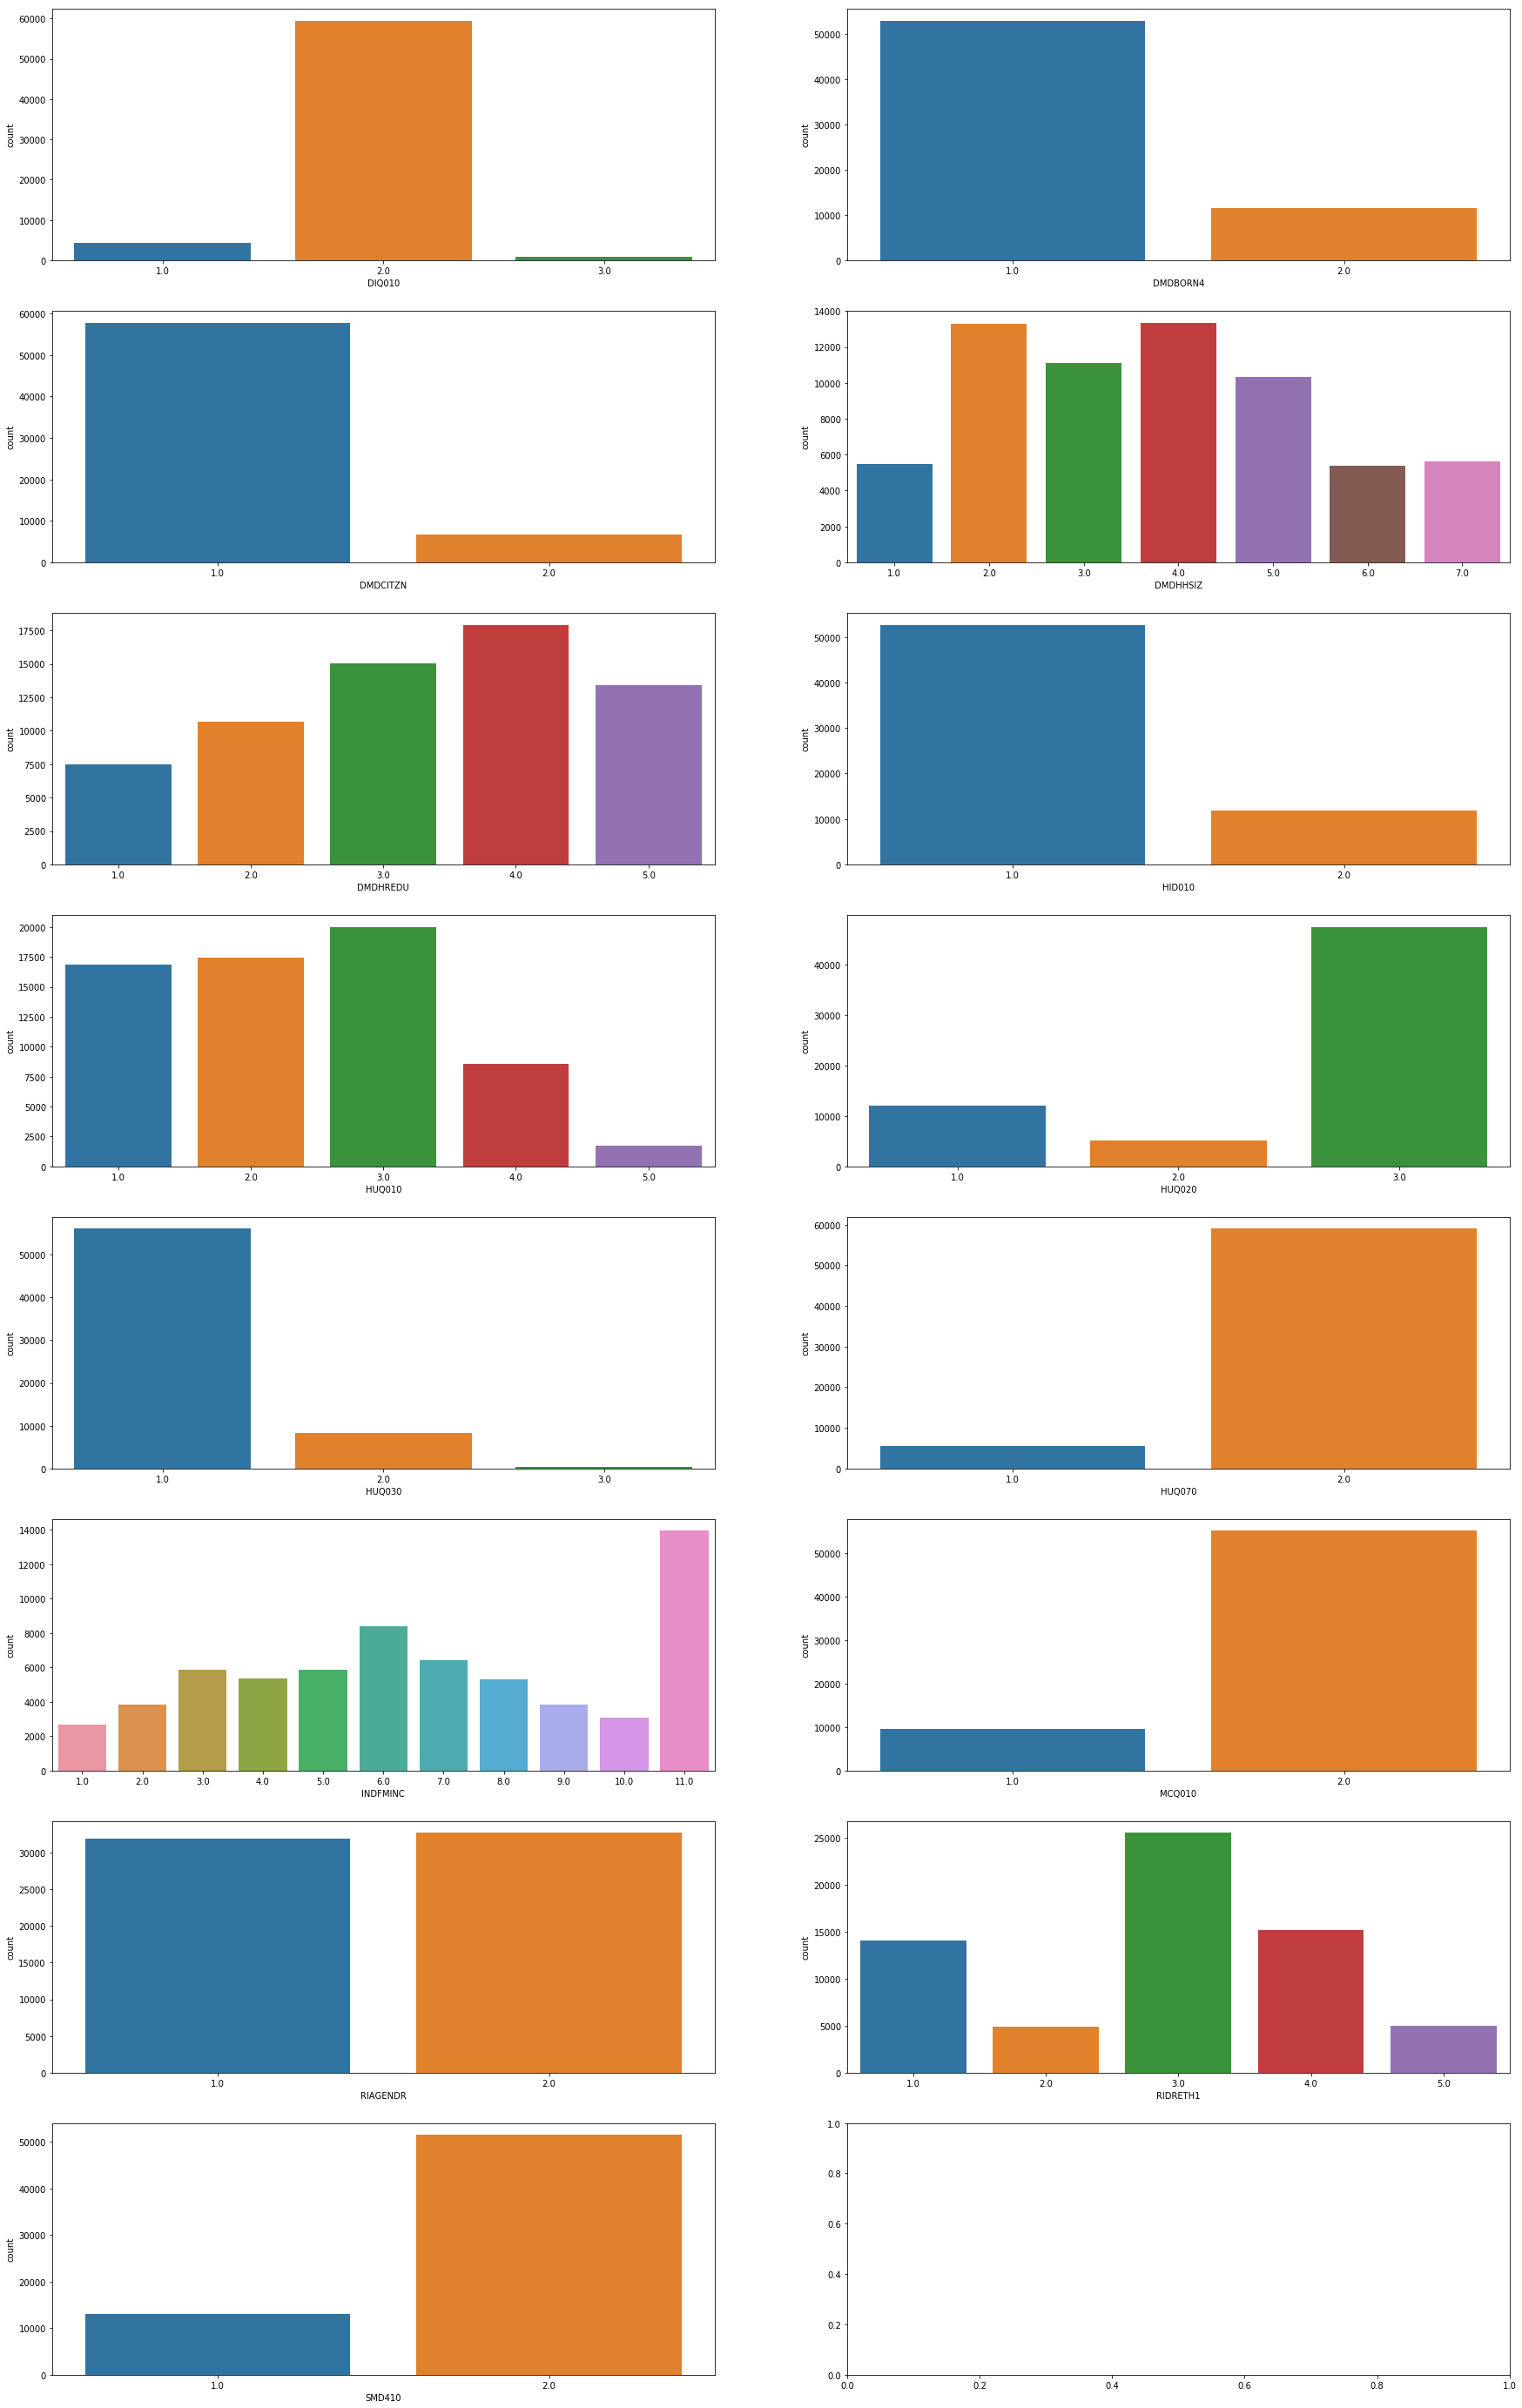

In [21]:
fig, ax = plt.subplots(8, 2, figsize=(30,50))
ax = ax.flatten()
for a, catplot in zip(ax, list(df_cat.columns)):
    sns.countplot(x=catplot, data=df_cat, ax=a)
plt.show()

### Numerical Features

In [22]:
#Get Numerical Features Only
df_num = df_no.copy()
df_num = df_num.select_dtypes(include=['float64'])
df_num = df_num.drop(['_id','MEC18YR','DRX18YR'], axis=1)

In [23]:
len(df_num.columns)

28

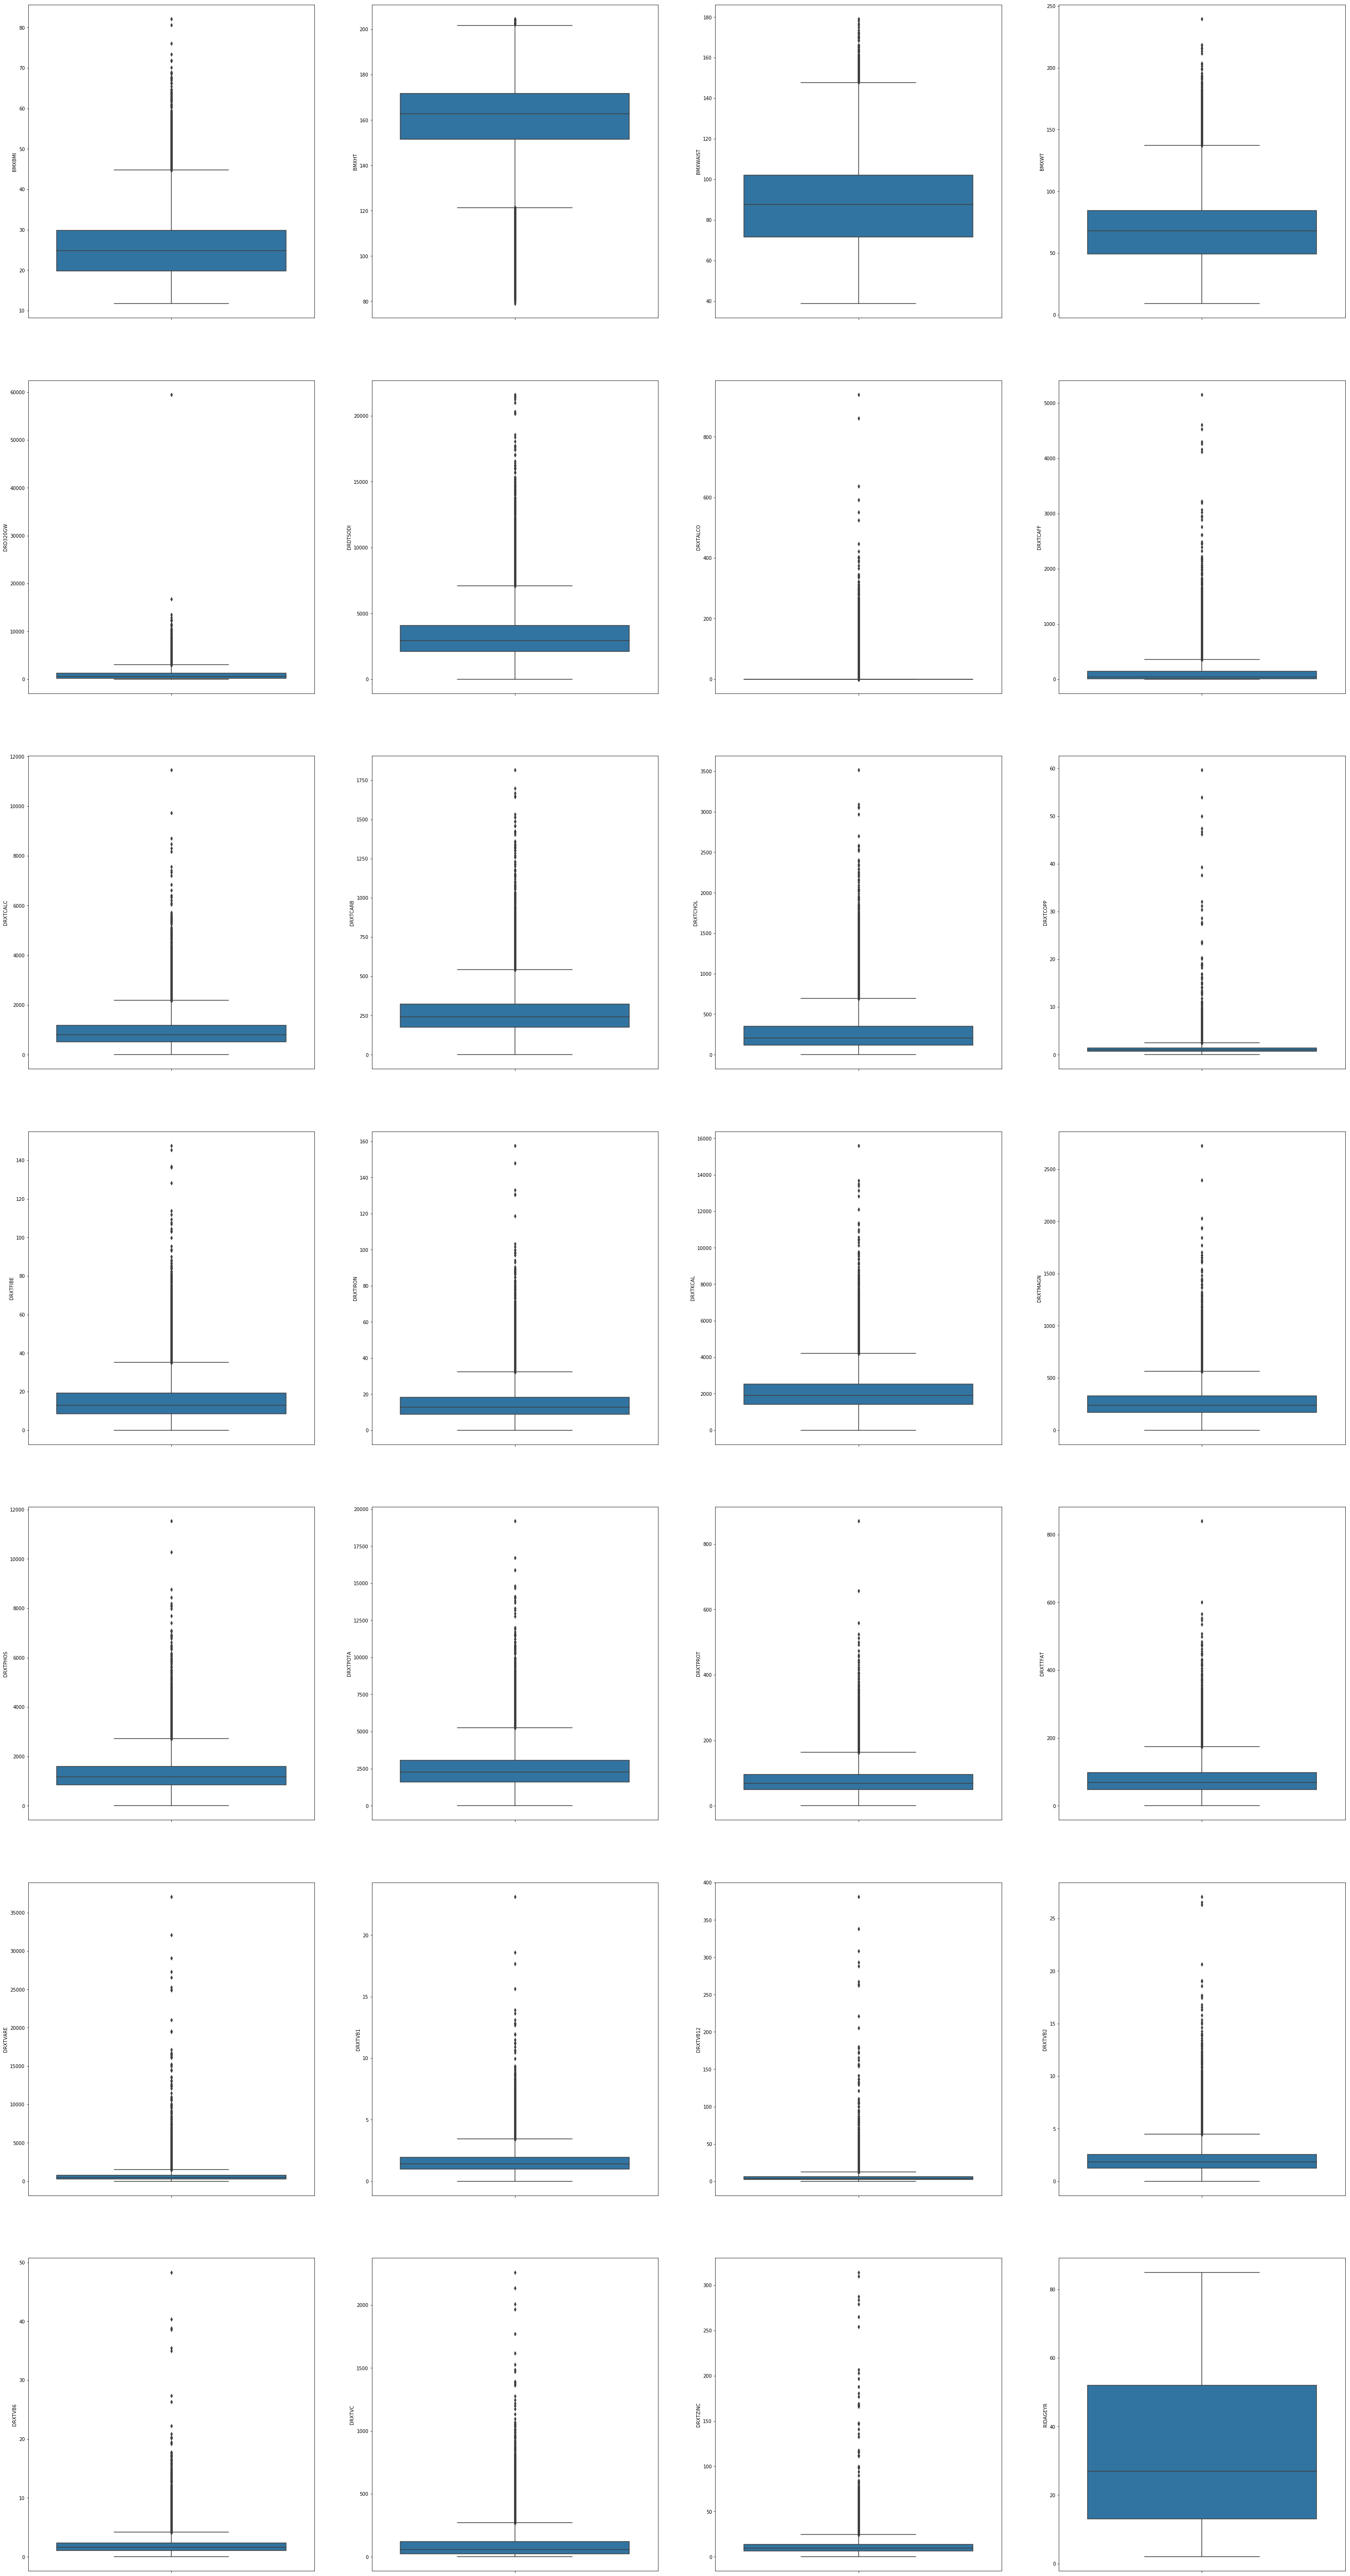

In [24]:
fig, ax = plt.subplots(7, 4, figsize=(50,100))
ax = ax.flatten()
for a, bp in zip(ax, list(df_num.columns)):
    sns.boxplot(y=bp, data=df_num, ax=a)
plt.show()

### Class Distribution

In [25]:
label_count = df_no.groupby(label, as_index = False).count()

In [26]:
#Count of class labels
class_names = list(label_count[label]) #Count the different labels
count = list(label_count['_id']) #Sum of different labels
count

[54917, 9666]

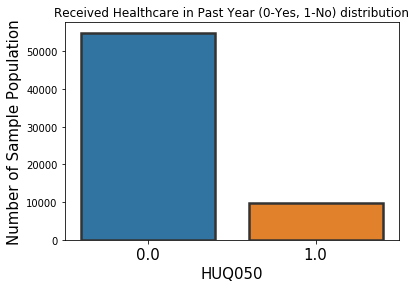

In [27]:
#Bar Plot of Class Labels
index = np.arange(len(class_names))
sns.barplot(x=class_names, y=count, linewidth=2.5, errcolor=".2", edgecolor=".2")
plt.xlabel(label, fontsize=15)
plt.ylabel('Number of Sample Population', fontsize=15)
plt.xticks(index, class_names, fontsize=15)
plt.title(labeldescr+' distribution')
plt.show()

In [28]:
#Find balance of labels
sum(df_no[label]==1)/(len(df_no[label]))
#0.8503 in majority class - Hospital Utilized in Past Year
#0.1497 in minority class - Didn't use Hospital

0.14966786925351871

## Class distribution as percentage of years

In [29]:
label_perc = df_no.groupby(['Year',label], as_index = False).count()

In [30]:
lp = label_perc[['Year', '_id',label]].copy()

In [286]:
perc = lp.groupby(['Year', '_id']).agg({'_id': 'sum'})
perc = perc.rename(columns={ perc.columns[0]: "pcts" })
perc = perc.sort_values(by=['Year','pcts'], ascending=[True, False])
# Change: groupby Year and divide by sum
label_pcts = perc.groupby(level=0).apply(lambda x: x / float(x.sum()))

In [288]:
#Get percentage values
lp['Percentages'] = label_pcts.values

In [290]:
lp.head()

,Year,_id,HUQ050,Percentages
0,0,5324,0.0,0.830189
1,0,1089,1.0,0.169811
2,1,6481,0.0,0.836258
3,1,1269,1.0,0.163742
4,2,6349,0.0,0.868536


In [291]:
year_names = list(lp['Year'])
class_names = list(lp[label])

In [292]:
perc = list(lp['Percentages'])

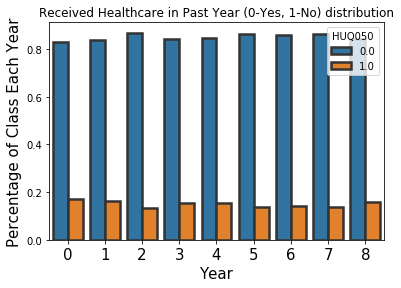

In [293]:
sns.barplot(x='Year', y='Percentages', data=lp, hue=label, linewidth=2.5, errcolor=".2", edgecolor=".2")
plt.xlabel('Year', fontsize=15)
plt.ylabel('Percentage of Class Each Year', fontsize=15)
plt.xticks(fontsize=15)
plt.title(labeldescr+' distribution')
plt.show()

## Correlation of Numerical Features

### Pearson's Coefficient

#### Correlation of Numerical features

In [37]:
df_no.shape

(64583, 48)

In [38]:
#get Correlations of each features in dataset
x = ['_id', 'Year', 'MEC18YR', 'DRX18YR']

corrmat = df_no[df_no.columns.difference(x)].corr()
top_corr_features = corrmat.index

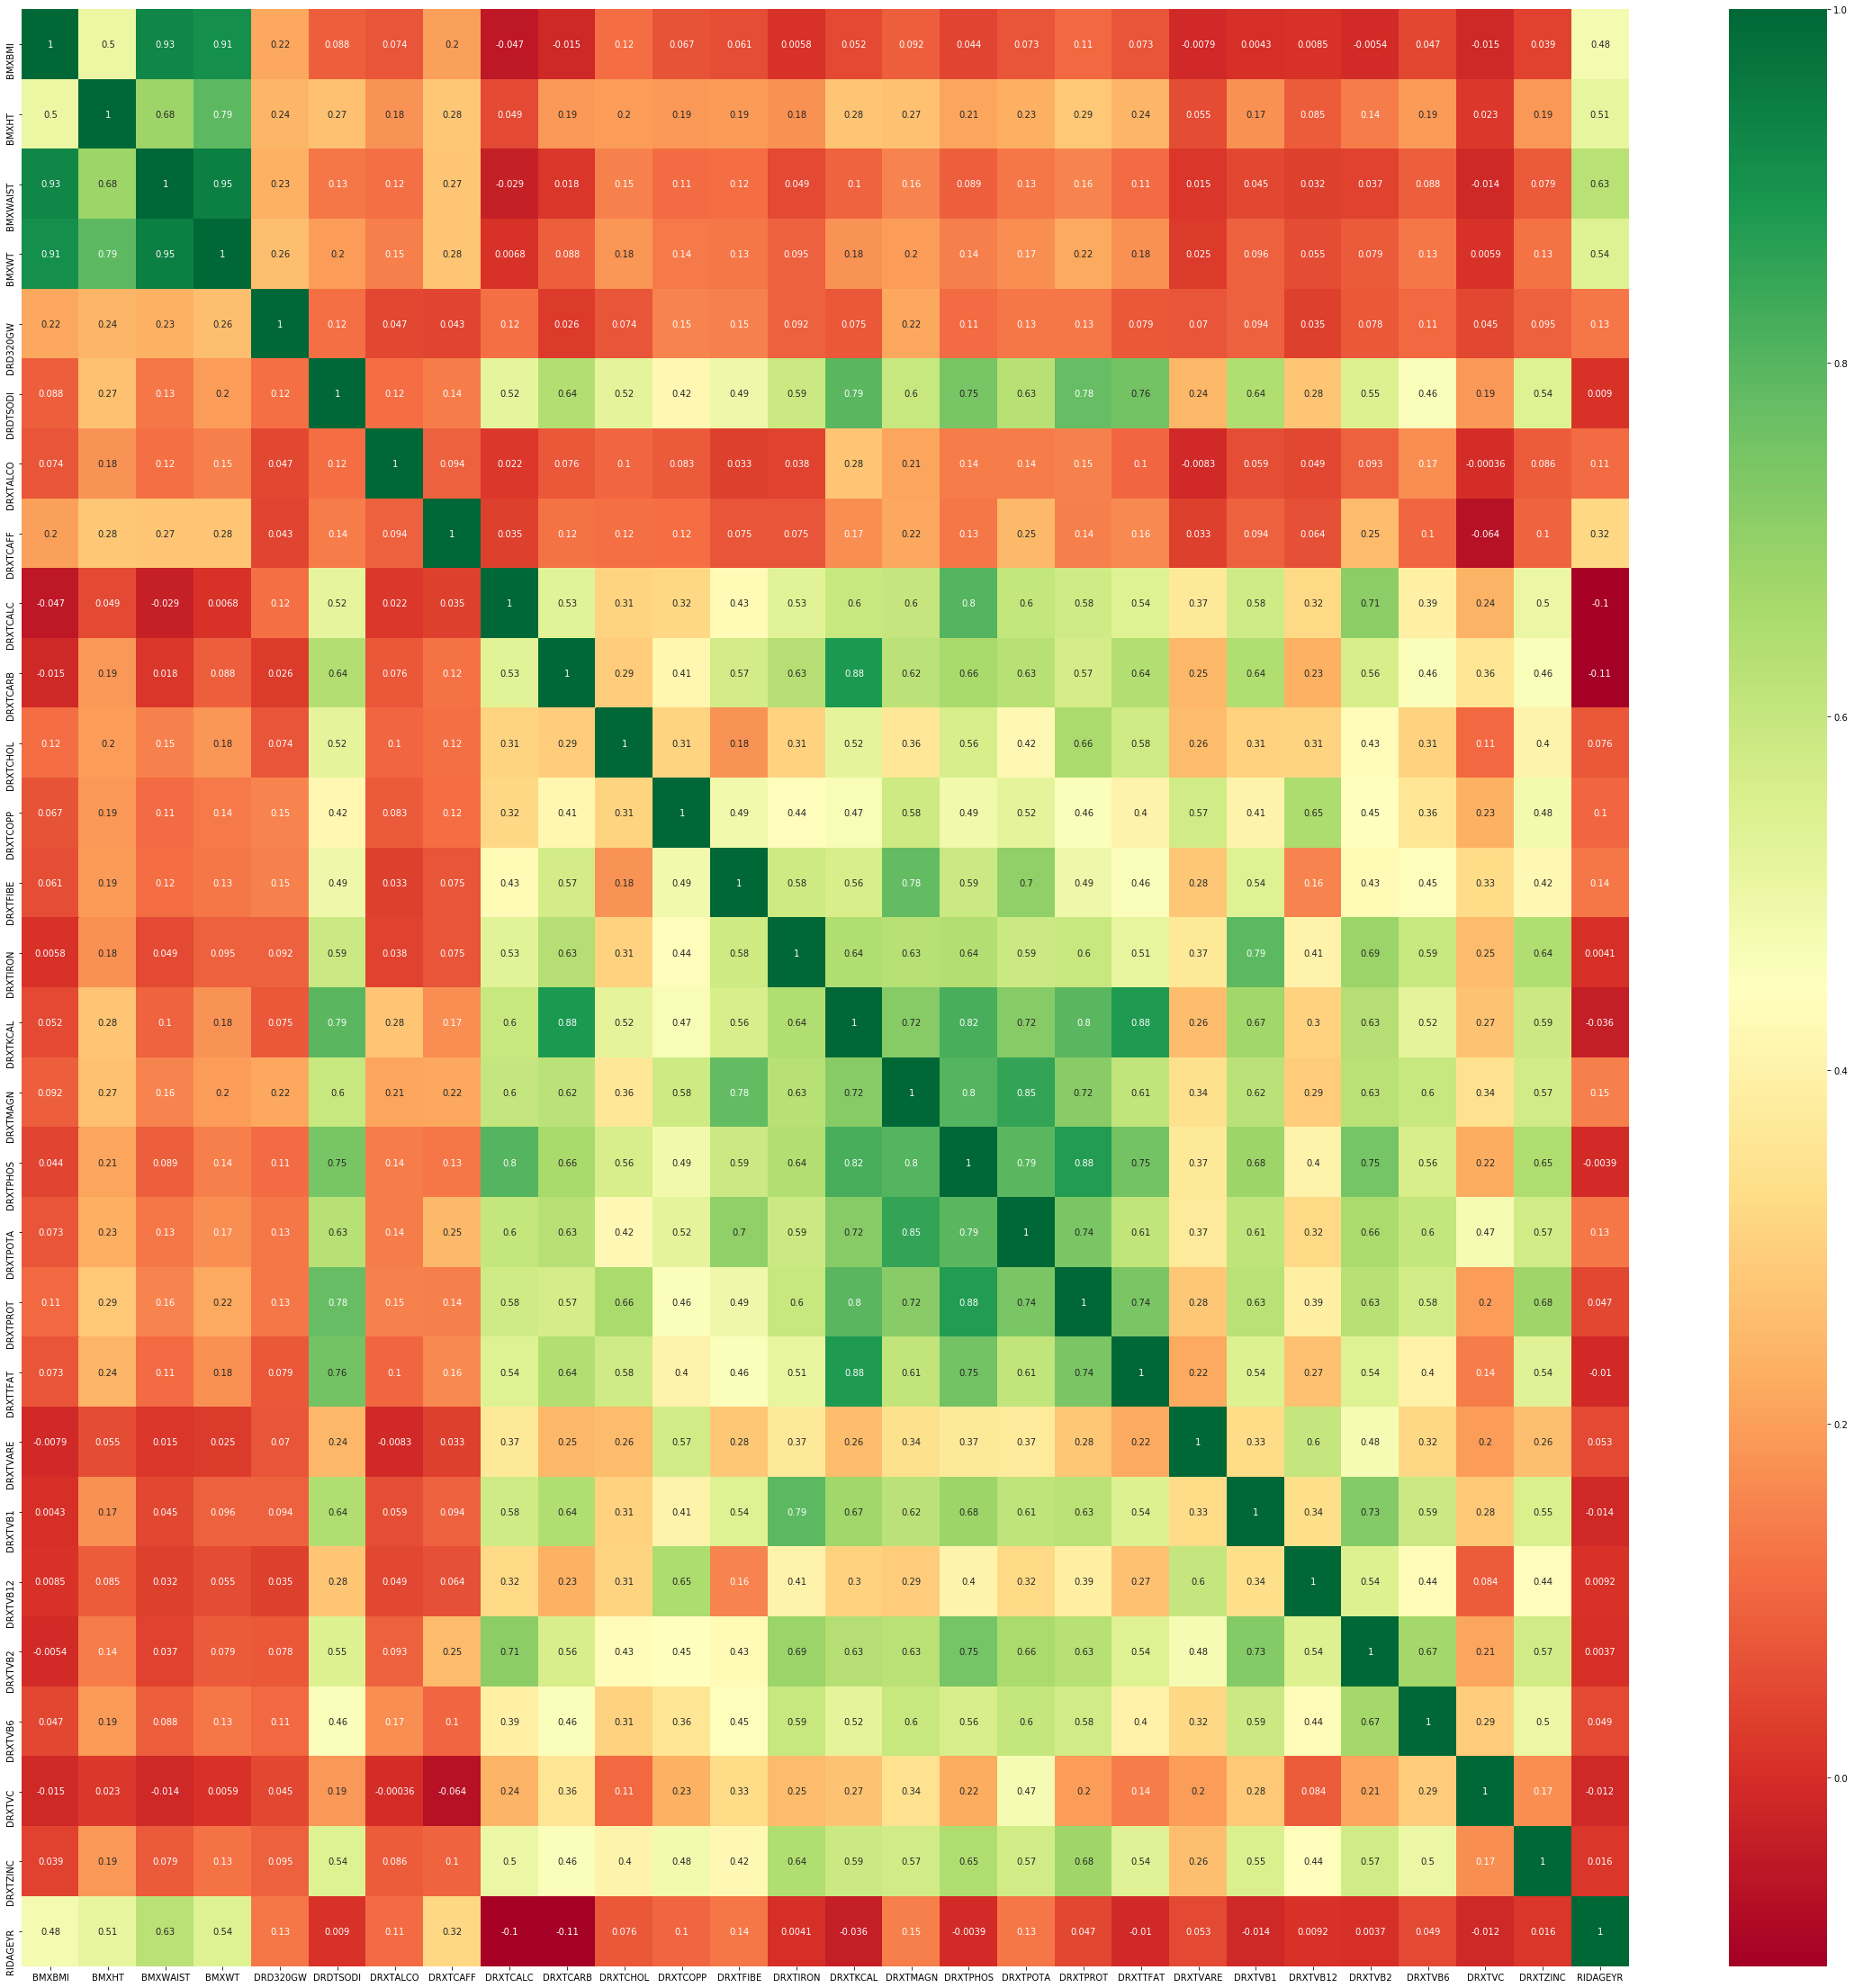

In [39]:
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [40]:
#cor_target = abs(corrmat[label])
#relevant_features = cor_target[cor_target>0.1]
#relevant_features

# Create X and y

In [41]:
#Drop variables
#Create X - drop id, label, and sample weight
X = df.drop(['_id', label], axis=1)

#Maintain id of X's
X_idx = df[['_id']]

#Create y - label
y = df[[label]]

#Create column to stratify based on year
year = df[['Year']]

In [42]:
X.shape

(64583, 52)

# Split Train, Test

In [43]:
#Train, test, split
from sklearn.model_selection import train_test_split, cross_val_score

In [44]:
#Stratify Train, Test based on Year Value
#80% Training, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=year)

In [45]:
#y_true is test label
y_true = y_test[label]

In [46]:
df['Year'].value_counts()

1    7750
5    7698
3    7634
4    7320
2    7310
7    7020
6    6781
8    6657
0    6413
Name: Year, dtype: int64

## Check if Stratified Sampling Worked

In [47]:
#See if years are split evenly in training and test
xt = X_train['Year'].value_counts()
xte = X_test['Year'].value_counts()

In [48]:
#Test is 20% of Training for each year
xte/(xte+xt)

1    0.200000
5    0.200052
3    0.200026
4    0.200000
2    0.200000
7    0.200000
6    0.199971
8    0.199940
0    0.200062
Name: Year, dtype: float64

In [49]:
#Test set label distribution
yt = y_true.value_counts()
yt

0.0    11021
1.0     1896
Name: HUQ050, dtype: int64

In [50]:
yt[0]/(yt[0]+yt[1])

0.853216691182163

In [51]:
#Train set label distribution
ytr = y_train[label].value_counts()
ytr

0.0    43896
1.0     7770
Name: HUQ050, dtype: int64

In [52]:
ytr[0]/(ytr[0]+ytr[1])

0.8496109627220997

# Resample: Upsample and Downsample (Not Used)

We have imbalanced data, so we want to do upsampling and downsampling to see if it will improve the model

In [53]:
from sklearn.utils import resample

In [54]:
#Resample training data function
def resample_train(X_train, y_train, sample_type, label):
    #Concatenate our training data back together
    X_r = pd.concat([X_train, y_train], axis=1)
    
    #Separate minority and majority classes
    minority = X_r[X_r[label]==1]
    majority = X_r[X_r[label]==0]
    
    if (sample_type=='up'):
        #Upsample minority class
        resampled = resample(minority,
                           replace=True, #Sample with replacement
                           n_samples=len(majority), #Match number in majority class
                           random_state=0) #Reproducible results
        notsampled=majority
    
    if (sample_type=='down'):
        #Downsample majority class
        resampled = resample(majority,
                           replace=False, #Sample without replacement
                           n_samples=len(minority), #Match minority n
                           random_state=0) #Reproducible results
        notsampled=minority
    
    #Combine upsample or downsample of majority and minority
    sampled = pd.concat([resampled, notsampled])
    y_train = sampled[[label]]
    X_train = sampled.drop([label], axis=1)
    return X_train, y_train    

#### Sklearn Upsampled

In [55]:
X_train_u, y_train_u = resample_train(X_train, y_train, 'up', label)

In [56]:
y_train_u[y_train_u[label]==1].shape

(43896, 1)

In [57]:
y_train_u[y_train_u[label]==0].shape

(43896, 1)

#### Sklearn Downsampled

In [58]:
X_train_d, y_train_d = resample_train(X_train, y_train, 'down', label)

In [59]:
y_train_d[y_train_d[label]==1].shape

(7770, 1)

In [60]:
y_train_d[y_train_d[label]==0].shape

(7770, 1)

# Imbalance Learn - SMOTE (Up) and TomekLinks (Down)

### Upsampling - SMOTE

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
sm = SMOTE(random_state=1)

In [63]:
X_sm, y_sm = sm.fit_sample(X_train, y_train.values.ravel())

In [64]:
#Before upsampling - Majority
len(y_train[y_train[label]==0])

43896

In [65]:
#Before upsampling - Minority
len(y_train[y_train[label]==1])

7770

In [66]:
#After upsampling, majority and minority match
sum(y_sm==0)

43896

In [67]:
sum(y_sm==1)

43896

### Downsampling - Tomeklinks

In [68]:
from imblearn.under_sampling import TomekLinks

In [69]:
tLinks = TomekLinks(random_state = 0, return_indices = True)

In [70]:
X_tl, y_tl, id_tl = tLinks.fit_sample(X_train, y_train.values.ravel())

In [71]:
#Before downsampling - Majority
len(y_train[y_train[label]==0])

43896

In [72]:
#Before downsampling - Minority
len(y_train[y_train[label]==1])

7770

In [73]:
#After downsampling, majority decreases in neighbors
sum(y_tl==0)

41239

In [74]:
sum(y_tl==1)

7770

# Clean Columns for Training Data

## Regular Training and Test

In [75]:
X_cols = list(X_train.columns)

#Get MEC18YR from training & test data
Xtr_sw = X_train[['MEC18YR']]
Xts_sw = X_test[['MEC18YR']]

#Get DRX18YR from training & test data
Xtr_dsw = X_train[['DRX18YR']]
Xts_dsw = X_test[['DRX18YR']]

#Get Year from training & test data
Xtr_yr = X_train[['Year']]
Xts_yr = X_test[['Year']]

#Drop columns for training
X_train = X_train.drop(['MEC18YR','DRX18YR','Year'], axis=1)
X_test = X_test.drop(['MEC18YR','DRX18YR','Year'], axis=1)

## SMOTE

In [76]:
X_sm = pd.DataFrame(X_sm, columns = X_cols)

In [77]:
X_sm.head()

,BMXBMI,BMXHT,BMXWAIST,BMXWT,DIQ010_2_0,DIQ010_3_0,DMDBORN4_2_0,DMDCITZN_2_0,DMDHHSIZ,DMDHREDU,DRD320GW,DRDTSODI,DRXTALCO,DRXTCAFF,DRXTCALC,DRXTCARB,DRXTCHOL,DRXTCOPP,DRXTFIBE,DRXTIRON,DRXTKCAL,DRXTMAGN,DRXTPHOS,DRXTPOTA,DRXTPROT,DRXTTFAT,DRXTVARE,DRXTVB1,DRXTVB12,DRXTVB2,DRXTVB6,DRXTVC,DRXTZINC,HID010_2_0,HUQ010,HUQ020_2_0,HUQ020_3_0,HUQ030_2_0,HUQ030_3_0,HUQ070_2_0,INDFMINC,MCQ010_2_0,RIAGENDR_2_0,RIDAGEYR,RIDRETH1_2_0,RIDRETH1_3_0,RIDRETH1_4_0,RIDRETH1_5_0,SMD410_2_0,Year,MEC18YR,DRX18YR
0,35.58,157.0,104.5,87.7,0.0,0.0,0.0,0.0,2.0,2.0,3.005310e+03,4195.0,5.397605e-79,3.670000e+02,1189.0,163.03,159.0,1.095,7.9,12.18,1484.0,213.0,1230.0,1476.0,70.78,59.88,262.0,1.795,3.22,2.102,0.869,8.1,8.12,0.0,4.0,0.0,1.0,0.0,0.0,1.0,8.0,1.0,1.0,52.0,1.0,0.0,0.0,0.0,0.0,4.0,1150.532227,632.756949
1,26.38,165.2,85.5,72.0,1.0,0.0,0.0,0.0,1.0,2.0,1.635130e+03,6661.0,1.849000e+02,5.670000e+02,1738.0,475.84,367.0,2.139,21.1,16.21,4561.0,456.0,2131.0,3422.0,95.15,122.24,672.0,1.487,3.81,3.277,1.660,47.8,11.93,0.0,3.0,0.0,1.0,0.0,0.0,1.0,10.0,1.0,1.0,52.0,0.0,1.0,0.0,0.0,1.0,4.0,11479.434448,6812.438300
2,35.18,178.5,113.0,112.1,1.0,0.0,0.0,0.0,1.0,4.0,1.000000e+03,3165.0,5.397605e-79,5.397605e-79,528.0,195.48,502.0,0.693,9.1,12.73,1763.0,184.0,909.0,2180.0,56.37,88.52,500.0,0.859,3.36,1.190,1.268,139.2,8.39,1.0,2.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,0.0,22.0,0.0,0.0,1.0,0.0,0.0,5.0,4335.067780,9740.587997
3,22.20,169.8,74.8,63.9,0.0,0.0,0.0,0.0,4.0,4.0,5.397605e-79,1744.0,1.120000e+01,7.800000e+01,362.0,100.16,151.0,0.449,5.1,8.82,1153.0,98.0,544.0,891.0,48.01,53.82,189.0,0.756,3.22,1.163,0.724,7.4,7.47,1.0,3.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,0.0,43.0,0.0,0.0,1.0,0.0,0.0,8.0,1981.127231,3941.537174
4,33.70,159.2,101.4,85.4,1.0,0.0,0.0,0.0,4.0,3.0,5.397605e-79,3753.0,5.397605e-79,1.170000e+02,448.0,113.97,355.0,0.983,7.0,12.51,1415.0,196.0,1016.0,2522.0,78.54,72.50,387.0,1.091,5.58,1.268,1.398,47.2,11.99,0.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,27.0,0.0,0.0,1.0,0.0,1.0,1.0,3840.306100,1884.544789


In [78]:
#Get MEC18YR from training
Xsm_sw = X_sm[['MEC18YR']]

#Get DRX18YR from training
Xsm_dsw = X_sm[['DRX18YR']]

#Get Year from training
Xsm_yr = X_sm[['Year']]

#Drop columns for training
X_sm = X_sm.drop(['MEC18YR','DRX18YR','Year'], axis=1)

## TomekLinks

In [79]:
X_tl = pd.DataFrame(X_tl, columns = X_cols)

In [80]:
#Get MEC18YR from training
Xtl_sw = X_tl[['MEC18YR']]

#Get DRX18YR from training
Xtl_dsw = X_tl[['DRX18YR']]

#Get Year from training
Xtl_yr = X_tl[['Year']]

#Drop sample weight
X_tl = X_tl.drop(['MEC18YR','DRX18YR','Year'], axis=1)

# Feature Selection

In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#### Drop MEC sample weight for X for feature selection

In [82]:
Xd = df_no.drop(['_id',label,'MEC18YR','DRX18YR','Year'], axis=1)
yd = df_no[label]

### Feature Selection

In [83]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=30)
fit = bestfeatures.fit(Xd,yd)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xd.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs          Score
19  DRXTKCAL  168691.365028
10  DRDTSODI  159794.034875
21  DRXTPHOS   56506.206149
22  DRXTPOTA   37172.846332
25  DRXTVARE   27887.084320
11  DRXTALCO   25780.859763
15  DRXTCHOL   24090.901594
14  DRXTCARB   16484.919535
12  DRXTCAFF   13667.154461
20  DRXTMAGN    9353.174568


### OHE Feature Selection

In [84]:
Xd = df.drop(['_id',label,'MEC18YR','DRX18YR','Year'], axis=1)
yd = df[label]

In [85]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xd,yd)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xd.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs          Score
20  DRXTKCAL  168691.365028
11  DRDTSODI  159794.034875
22  DRXTPHOS   56506.206149
23  DRXTPOTA   37172.846332
26  DRXTVARE   27887.084320
12  DRXTALCO   25780.859763
16  DRXTCHOL   24090.901594
15  DRXTCARB   16484.919535
13  DRXTCAFF   13667.154461
21  DRXTMAGN    9353.174568


# Data Analysis: Random Forest and XGBoost

### Import Machine Learning Libraries

In [86]:
#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import plot_importance

#Grid Search
from sklearn.model_selection import GridSearchCV

#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score
from sklearn.metrics import mean_squared_error, classification_report, f1_score

# Random Forest

## GridSearch: Define parameters and run

### Regular Training

In [87]:
#clf = RandomForestClassifier(random_state=1)

#Define Parameter Grid for GridSearchCV
# param_grid = {
#     'n_estimators' : [200],
#     'max_features' : ['auto'],
#     'max_depth' : [4, 8, 15],
#     'criterion' : ['gini'],
#     'class_weight' : [{0:.2, 1:.8},'balanced']
# }

In [88]:
#cv_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', verbose=2, cv=3)

In [89]:
#cv_rfc.fit(X_train, y_train.values.ravel())

In [90]:
#cv_rfc.best_params_
# {'class_weight': {0: 0.2, 1: 0.8},
#  'criterion': 'gini',
#  'max_depth': 8,
#  'max_features': 'auto',
#  'n_estimators': 200}

In [91]:
#cv_rfc.best_estimator_
# RandomForestClassifier(bootstrap=True, class_weight={0: 0.2, 1: 0.8},
#             criterion='gini', max_depth=8, max_features='auto',
#             max_leaf_nodes=None, min_impurity_decrease=0.0,
#             min_impurity_split=None, min_samples_leaf=1,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
#             verbose=0, warm_start=False)

In [92]:
#cv_rfc.best_score_
#0.4834335889012728

### Upsampling: SMOTE

In [93]:
#clf_u = RandomForestClassifier(random_state=1)

In [94]:
#cv_rfc_u = GridSearchCV(estimator=clf_u, param_grid=param_grid, scoring='f1', verbose=2, cv=3)

In [95]:
#cv_rfc_u.fit(X_sm, y_sm)

In [96]:
#cv_rfc_u.best_params_
# {'class_weight': 'balanced',
#  'criterion': 'gini',
#  'max_depth': 15,
#  'max_features': 'auto',
#  'n_estimators': 200}

In [97]:
#cv_rfc_u.best_estimator_
# RandomForestClassifier(bootstrap=True, class_weight='balanced',
#             criterion='gini', max_depth=15, max_features='auto',
#             max_leaf_nodes=None, min_impurity_decrease=0.0,
#             min_impurity_split=None, min_samples_leaf=1,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
#             verbose=0, warm_start=False)

In [98]:
#cv_rfc_u.best_score_
#0.8679143115988156

### Downsampling: TomekLinks

In [99]:
#clf_d = RandomForestClassifier(random_state=1)

In [100]:
#cv_rfc_d = GridSearchCV(estimator= clf_d, param_grid=param_grid, scoring='f1', verbose=2, cv=3)

In [101]:
#cv_rfc_d.fit(X_tl, y_tl)

In [102]:
#cv_rfc_d.best_params_
# {'class_weight': {0: 0.2, 1: 0.8},
#  'criterion': 'gini',
#  'max_depth': 8,
#  'max_features': 'auto',
#  'n_estimators': 200}

In [103]:
#cv_rfc_d.best_estimator_
# RandomForestClassifier(bootstrap=True, class_weight={0: 0.2, 1: 0.8},
#             criterion='gini', max_depth=8, max_features='auto',
#             max_leaf_nodes=None, min_impurity_decrease=0.0,
#             min_impurity_split=None, min_samples_leaf=1,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
#             verbose=0, warm_start=False)

In [104]:
#cv_rfc_d.best_score_
#0.49652972472172574

## Define Classifier with Best Parameters and Fit

### Regular Training

In [105]:
clf_r = RandomForestClassifier(bootstrap=True, class_weight={0: 0.2, 1: 0.8},
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [106]:
clf_r.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight={0: 0.2, 1: 0.8},
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

### Upsampling: SMOTE

In [107]:
clf_s = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [108]:
clf_s.fit(X_sm, y_sm)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

### Downsampling: TomekLinks

In [109]:
clf_t = RandomForestClassifier(bootstrap=True, class_weight={0: 0.2, 1: 0.8},
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [110]:
clf_t.fit(X_tl, y_tl)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.2, 1: 0.8},
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

## Feature Importance from Random Forest

### Regular Training

In [111]:
rf_output = pd.DataFrame(clf_r.feature_importances_) #Get importance of features in order
rf_output['Label'] = X_train.columns
rf_output.columns = ['Feature_Importance', 'Label']

In [112]:
rf_oo_r = rf_output.nlargest(10, 'Feature_Importance')

In [113]:
rf_oo_r_s = rf_oo_r.sort_values(by=['Feature_Importance'])

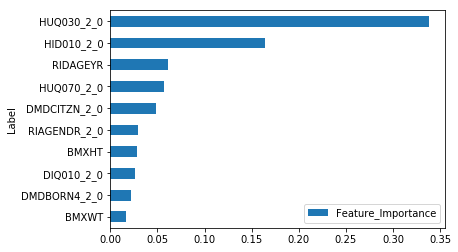

In [114]:
ax_r = rf_oo_r_s.plot.barh(y='Feature_Importance', x='Label')

### Upsampling: SMOTE

In [115]:
rf_output = pd.DataFrame(clf_s.feature_importances_)
rf_output['Label'] = X_sm.columns
rf_output.columns = ['Feature_Importance', 'Label']

In [116]:
rf_oo_u = rf_output.nlargest(10, 'Feature_Importance')

In [117]:
rf_oo_u_s = rf_oo_u.sort_values(by=['Feature_Importance'])

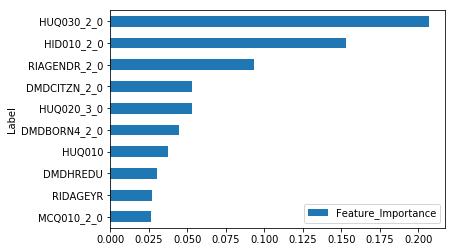

In [118]:
ax_u = rf_oo_u_s.plot.barh(y='Feature_Importance', x='Label')

### Downsampling: TomekLinks

In [119]:
rf_output = pd.DataFrame(clf_t.feature_importances_)
rf_output['Label'] = X_tl.columns
rf_output.columns = ['Feature_Importance', 'Label']

In [120]:
rf_oo_d = rf_output.nlargest(10, 'Feature_Importance')

In [121]:
rf_oo_d_s = rf_oo_d.sort_values(by=['Feature_Importance'])

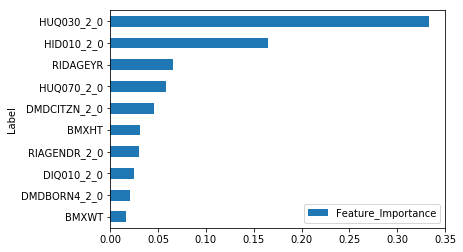

In [122]:
ax_d = rf_oo_d_s.plot.barh(y='Feature_Importance', x='Label')

# Model Evaluation

## Confusion Matrix & Classification Reports

### Regular Training

In [123]:
pred_r = clf_r.predict(X_test)

In [124]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_r, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0.0,1.0,All
True,,,
0.0,9762,1259,11021
1.0,853,1043,1896
All,10615,2302,12917


In [125]:
r_output = '{} \n Accuracy: {}'
r = r_output.format(classification_report(y_true, pred_r, labels=[0,1]), accuracy_score(y_true, pred_r))
print(r)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90     11021
           1       0.45      0.55      0.50      1896

   micro avg       0.84      0.84      0.84     12917
   macro avg       0.69      0.72      0.70     12917
weighted avg       0.85      0.84      0.84     12917
 
 Accuracy: 0.8364945420763336


### Upsampling: SMOTE

In [126]:
pred_s = clf_s.predict(X_test)

In [127]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_s, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0.0,1.0,All
True,,,
0.0,10564,457,11021
1.0,1261,635,1896
All,11825,1092,12917


In [128]:
u_output = '{} \n Accuracy: {}'
u = u_output.format(classification_report(y_true, pred_s, labels=[0,1]), accuracy_score(y_true, pred_s))
print(u)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     11021
           1       0.58      0.33      0.43      1896

   micro avg       0.87      0.87      0.87     12917
   macro avg       0.74      0.65      0.67     12917
weighted avg       0.85      0.87      0.85     12917
 
 Accuracy: 0.8669969807230781


### Downsampling: TomekLinks

In [129]:
pred_t = clf_t.predict(X_test)

In [130]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_t, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0.0,1.0,All
True,,,
0.0,9643,1378,11021
1.0,818,1078,1896
All,10461,2456,12917


In [131]:
d_output = '{} \n Accuracy: {}'
d = d_output.format(classification_report(y_true, pred_t, labels=[0,1]), accuracy_score(y_true, pred_t))
print(d)

              precision    recall  f1-score   support

           0       0.92      0.87      0.90     11021
           1       0.44      0.57      0.50      1896

   micro avg       0.83      0.83      0.83     12917
   macro avg       0.68      0.72      0.70     12917
weighted avg       0.85      0.83      0.84     12917
 
 Accuracy: 0.8299914840907331


## ROC AUC Score

### Regular Training

In [132]:
prob_y_2_r = clf_r.predict_proba(X_test)
prob_y_2_r = [p[1] for p in prob_y_2_r]
print('ROC AUC Score: ', roc_auc_score(y_true, prob_y_2_r))

ROC AUC Score:  0.81004972478701


### Upsampling:  SMOTE

In [133]:
prob_y_2_s = clf_s.predict_proba(X_test)
prob_y_2_s = [p[1] for p in prob_y_2_s]
print('ROC AUC Score: ', roc_auc_score(y_true, prob_y_2_s))

ROC AUC Score:  0.811606782908119


### Downsampling: TomekLinks

In [134]:
prob_y_2_t = clf_t.predict_proba(X_test)
prob_y_2_t = [p[1] for p in prob_y_2_t]
print('ROC AUC Score: ', roc_auc_score(y_true, prob_y_2_t))

ROC AUC Score:  0.810253497637996


## Adjust Predictions Based on Probability Threshold

In [135]:
#Import Metrics
from sklearn.metrics import recall_score, precision_score

In [136]:
#Custom cutoff probability
def cutoff_predict(clf, X, cutoff):
    return (clf.predict_proba(X)[:,1]> cutoff).astype(int)

#Custom scoring function
def custom_f1(cutoff):
    def f1_cutoff(clf, X, y):
        ypred = cutoff_predict(clf, X, cutoff)
        return f1_score(y, ypred)
    return f1_cutoff

### Regular Training

In [139]:
# scores_r = []
cutoffs_r = np.arange(0.3, 0.6, 0.05)

# for cutoff in cutoffs_r:
#     validated = cross_val_score(clf_r, X_train, y_train.values.ravel(), cv = 3, scoring = custom_f1(cutoff), verbose = 1)
#     scores_r.append(validated)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   51.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   53.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   50.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   55.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   58.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   53.7s finished


In [174]:
#scores_r output saved:
# [array([0.3794154 , 0.37961395, 0.37401903]),
#  array([0.43351064, 0.42581802, 0.42032382]),
#  array([0.47889801, 0.46373501, 0.46916077]),
#  array([0.49130939, 0.47567744, 0.47874067]),
#  array([0.48896187, 0.47890909, 0.48242981]),
#  array([0.48145872, 0.46828879, 0.48170247])]

In [175]:
scores_r_saved = [[0.3794154 , 0.37961395, 0.37401903],
 [0.43351064, 0.42581802, 0.42032382],
 [0.47889801, 0.46373501, 0.46916077],
 [0.49130939, 0.47567744, 0.47874067],
 [0.48896187, 0.47890909, 0.48242981],
 [0.48145872, 0.46828879, 0.48170247]]

In [176]:
#Melt and make scores into dataframe
scores_rdf = pd.DataFrame(scores_r_saved.copy())
#Rename columns
scores_rdf['Cutoff'] = pd.DataFrame(cutoffs_r).round(2)
#Create cutoff column values
scores_rdf = pd.melt(scores_rdf, id_vars='Cutoff')
scores_rdf.columns = ['Cutoff', 'CV', 'F Score'] 

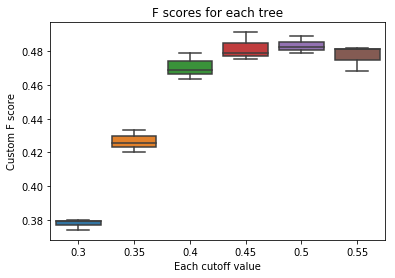

In [177]:
#Boxplot of 3-CV to determine F Score
sns.boxplot(x='Cutoff', y='F Score', data = scores_rdf)
plt.title('F scores for each tree')
plt.xlabel('Each cutoff value')
plt.ylabel('Custom F score')
plt.show()

Looks like the optimal cutoff is 0.5

In [142]:
cutoff_r = 0.5

### Upsampling: SMOTE

In [144]:
# scores_u = []
cutoffs_u = np.arange(0.35, 0.65, 0.05)

# for cutoff in cutoffs_u:
#     validated = cross_val_score(clf_s, X_sm, y_sm, cv = 3, scoring = custom_f1(cutoff), verbose = 1)
#     scores_u.append(validated)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [170]:
#scores_u ouput:
# [array([0.7304252 , 0.93146487, 0.92891267]),
#  array([0.71111882, 0.94791022, 0.94760152]),
#  array([0.6941681 , 0.95730114, 0.95539426]),
#  array([0.67898466, 0.96247403, 0.96096698]),
#  array([0.66394076, 0.96628833, 0.96461284]),
#  array([0.65173284, 0.9669855 , 0.96634977]),
#  array([0.63748608, 0.96424364, 0.96491653])]

[array([0.7304252 , 0.93146487, 0.92891267]),
 array([0.71111882, 0.94791022, 0.94760152]),
 array([0.6941681 , 0.95730114, 0.95539426]),
 array([0.67898466, 0.96247403, 0.96096698]),
 array([0.66394076, 0.96628833, 0.96461284]),
 array([0.65173284, 0.9669855 , 0.96634977]),
 array([0.63748608, 0.96424364, 0.96491653])]

In [153]:
scores_u_saved = [[0.7304252 , 0.93146487, 0.92891267],
[0.71111882, 0.94791022, 0.94760152],
[0.6941681 , 0.95730114, 0.95539426],
[0.67898466, 0.96247403, 0.96096698],
[0.66394076, 0.96628833, 0.96461284],
[0.65173284, 0.9669855 , 0.96634977],
[0.63748608, 0.96424364, 0.96491653]]

In [171]:
#Melt and make scores into dataframe
scores_udf = pd.DataFrame(scores_u_saved.copy())
#Rename columns
scores_udf['Cutoff'] = pd.DataFrame(cutoffs_u).round(2)
#Create cutoff column values
scores_udf = pd.melt(scores_udf, id_vars='Cutoff')
scores_udf.columns = ['Cutoff', 'CV', 'F Score'] 

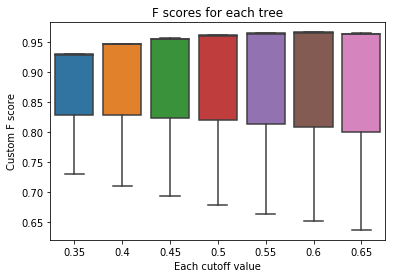

In [172]:
#Boxplot of 3-CV to determine F Score
sns.boxplot(x='Cutoff', y='F Score', data = scores_udf)
plt.title('F scores for each tree')
plt.xlabel('Each cutoff value')
plt.ylabel('Custom F score')
plt.show()

In [178]:
scores_udf.groupby('Cutoff').mean()

,F Score
Cutoff,
0.35,0.863601
0.40,0.868877
0.45,0.868955
0.50,0.867475
0.55,0.864947
0.60,0.861689
0.65,0.855549


Looks like the optimal cutoff is 0.45

In [157]:
cutoff_u = 0.45

### Downsampling: TomekLinks

In [161]:
# scores_d = []
cutoffs_d = np.arange(0.1, 0.65, 0.05)

# for cutoff in cutoffs_d:
#     validated = cross_val_score(clf_t, X_tl, y_tl, cv = 3, scoring = custom_f1(cutoff), verbose = 1)
#     scores_d.append(validated)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   53.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   53.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   55.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   53.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   55.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   45.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [179]:
#scores_d output:
# [array([0.28139282, 0.28063712, 0.28086353]),
#  array([0.29553265, 0.29280453, 0.29626647]),
#  array([0.32035567, 0.31950286, 0.31956134]),
#  array([0.34376538, 0.34832019, 0.3464928 ]),
#  array([0.37907432, 0.38015571, 0.37909581]),
#  array([0.43748678, 0.43074614, 0.42348312]),
#  array([0.48326096, 0.46025105, 0.47295251]),
#  array([0.49933993, 0.48833843, 0.49011599]),
#  array([0.50053706, 0.49388406, 0.49516781]),
#  array([0.49612711, 0.48522119, 0.48758553]),
#  array([0.47053531, 0.46378738, 0.47464325])]

In [167]:
scores_d_saved=[[0.28139282, 0.28063712, 0.28086353],
[0.29553265, 0.29280453, 0.29626647],
[0.32035567, 0.31950286, 0.31956134],
[0.34376538, 0.34832019, 0.3464928 ],
[0.37907432, 0.38015571, 0.37909581],
[0.43748678, 0.43074614, 0.42348312],
[0.48326096, 0.46025105, 0.47295251],
[0.49933993, 0.48833843, 0.49011599],
[0.50053706, 0.49388406, 0.49516781],
[0.49612711, 0.48522119, 0.48758553],
[0.47053531, 0.46378738, 0.47464325]]

In [168]:
#Melt and make scores into dataframe
scores_ddf = pd.DataFrame(scores_d_saved.copy())
#Rename columns
scores_ddf['Cutoff'] = pd.DataFrame(cutoffs_d).round(2)
#Create cutoff column values
scores_ddf = pd.melt(scores_ddf, id_vars='Cutoff')
scores_ddf.columns = ['Cutoff', 'CV', 'F Score'] 

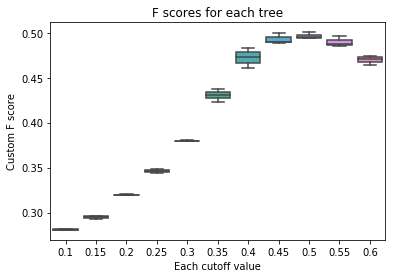

In [169]:
#Boxplot of 3-CV to determine F Score
sns.boxplot(x='Cutoff', y='F Score', data = scores_ddf)
plt.title('F scores for each tree')
plt.xlabel('Each cutoff value')
plt.ylabel('Custom F score')
plt.show()

In [164]:
scores_ddf.groupby('Cutoff').mean()

,F Score
Cutoff,
0.10,0.280964
0.15,0.294868
0.20,0.319807
0.25,0.346193
0.30,0.379442
0.35,0.430572
0.40,0.472155
0.45,0.492598
0.50,0.496530


Looks like the optimal is 0.50

In [165]:
cutoff_d = 0.50

## Model Evaluation based on Optimal Probability Cutoff

### Regular Training

In [180]:
pred_rc = np.where(pd.DataFrame(prob_y_2_r)>cutoff_r, 1, 0).flatten()

In [181]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_rc, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0.0,9762,1259,11021
1.0,853,1043,1896
All,10615,2302,12917


In [182]:
rc_output = '{} \n Accuracy: {}'
rc = rc_output.format(classification_report(y_true, pred_rc, labels=[0,1]), accuracy_score(y_true, pred_rc))
print(rc)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90     11021
           1       0.45      0.55      0.50      1896

   micro avg       0.84      0.84      0.84     12917
   macro avg       0.69      0.72      0.70     12917
weighted avg       0.85      0.84      0.84     12917
 
 Accuracy: 0.8364945420763336


In [183]:
#Compare with default cutoff 0.5
print(r)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90     11021
           1       0.45      0.55      0.50      1896

   micro avg       0.84      0.84      0.84     12917
   macro avg       0.69      0.72      0.70     12917
weighted avg       0.85      0.84      0.84     12917
 
 Accuracy: 0.8364945420763336


### Upsampling: SMOTE 

In [184]:
pred_uc = np.where(pd.DataFrame(prob_y_2_s)>cutoff_u, 1, 0).flatten()

In [185]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_uc, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0.0,10426,595,11021
1.0,1148,748,1896
All,11574,1343,12917


In [186]:
uc_output = '{} \n Accuracy: {}'
uc = uc_output.format(classification_report(y_true, pred_uc, labels=[0,1]), accuracy_score(y_true, pred_uc))
print(uc)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     11021
           1       0.56      0.39      0.46      1896

   micro avg       0.87      0.87      0.87     12917
   macro avg       0.73      0.67      0.69     12917
weighted avg       0.85      0.87      0.86     12917
 
 Accuracy: 0.8650615467987923


In [187]:
#Compare with default cutoff 0.5
print(u)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     11021
           1       0.58      0.33      0.43      1896

   micro avg       0.87      0.87      0.87     12917
   macro avg       0.74      0.65      0.67     12917
weighted avg       0.85      0.87      0.85     12917
 
 Accuracy: 0.8669969807230781


### Downsampling: TomekLinks

In [188]:
pred_dc = np.where(pd.DataFrame(prob_y_2_t)>cutoff_d, 1, 0).flatten()

In [189]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_dc, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0.0,9643,1378,11021
1.0,818,1078,1896
All,10461,2456,12917


In [190]:
dc_output = '{} \n Accuracy: {}'
dc = dc_output.format(classification_report(y_true, pred_dc, labels=[0,1]), accuracy_score(y_true, pred_dc))
print(dc)

              precision    recall  f1-score   support

           0       0.92      0.87      0.90     11021
           1       0.44      0.57      0.50      1896

   micro avg       0.83      0.83      0.83     12917
   macro avg       0.68      0.72      0.70     12917
weighted avg       0.85      0.83      0.84     12917
 
 Accuracy: 0.8299914840907331


In [191]:
print(d)

              precision    recall  f1-score   support

           0       0.92      0.87      0.90     11021
           1       0.44      0.57      0.50      1896

   micro avg       0.83      0.83      0.83     12917
   macro avg       0.68      0.72      0.70     12917
weighted avg       0.85      0.83      0.84     12917
 
 Accuracy: 0.8299914840907331


## XGBOOST

In [ ]:
# A parameter grid for XGBoost
# params = {
#         'max_depth': [2, 3, 4],
#         'subsample': [1.0],
#         'colsample_bytree': [0.6, 1.0],
#         'scale_pos_weight': [2, 3, 4],
#         'learning_rate' : [0.1],
#         'n_estimators' : [200]
#         }

### Regular Training

#### GridSearch

In [ ]:
#xg_class_r = xgb.XGBClassifier(objective ='binary:logistic', random_state = 1, verbose = 1)

In [ ]:
#cv_xgr = GridSearchCV(estimator=xg_class_r, param_grid=params, scoring='f1', verbose=2, cv=3)

In [ ]:
#cv_xgr.fit(X_train, y_train.values.ravel())

In [ ]:
#cv_xgr.best_params_
# {'colsample_bytree': 1.0,
#  'learning_rate': 0.1,
#  'max_depth': 2,
#  'n_estimators': 200,
#  'scale_pos_weight': 3,
#  'subsample': 1.0}

In [ ]:
#cv_xgr.best_score_
#0.48776669882410517

#### Best Parameter

In [ ]:
#cv_xgr.best_estimator_

In [192]:
xg_clf_r = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=None,
       silent=True, subsample=1.0, verbose=1)

#### Predict

In [193]:
xg_clf_r.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=None,
       silent=True, subsample=1.0, verbose=1)

In [194]:
pred_xgr = xg_clf_r.predict(X_test)

#### Evaluation

In [195]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_xgr, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0.0,1.0,All
True,,,
0.0,9857,1164,11021
1.0,859,1037,1896
All,10716,2201,12917


In [196]:
rxg_output = '{} \n Accuracy: {}'
rxg = rxg_output.format(classification_report(y_true, pred_xgr, labels=[0,1]), accuracy_score(y_true, pred_xgr))
print(rxg)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     11021
           1       0.47      0.55      0.51      1896

   micro avg       0.84      0.84      0.84     12917
   macro avg       0.70      0.72      0.71     12917
weighted avg       0.85      0.84      0.85     12917
 
 Accuracy: 0.843384686846791


##### Compare with Random Forest

In [197]:
print(r)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90     11021
           1       0.45      0.55      0.50      1896

   micro avg       0.84      0.84      0.84     12917
   macro avg       0.69      0.72      0.70     12917
weighted avg       0.85      0.84      0.84     12917
 
 Accuracy: 0.8364945420763336


#### Feature Importance for XGBoost 

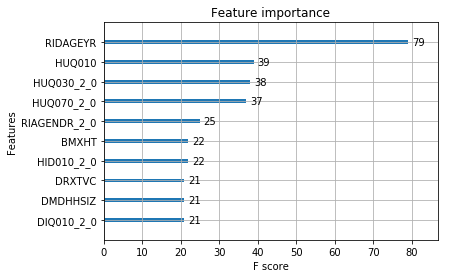

In [198]:
plot_importance(xg_clf_r, max_num_features = 10)

### Upsampling: SMOTE

#### GridSearch

In [199]:
#xg_class_u = xgb.XGBClassifier(objective ='binary:logistic', random_state = 1, verbose = 1)

In [200]:
#cv_xgu = GridSearchCV(estimator=xg_class_u, param_grid=params, scoring='f1', verbose=2, cv=3)

In [201]:
#cv_xgu.fit(X_sm, y_sm)

In [202]:
#cv_xgu.best_params_
# {'colsample_bytree': 1.0,
#  'learning_rate': 0.1,
#  'max_depth': 4,
#  'n_estimators': 200,
#  'scale_pos_weight': 2,
#  'subsample': 1.0}

In [203]:
#cv_xgu.best_score_
#0.843102948950529

#### Best Parameter

In [204]:
#cv_xgu.best_estimator_

In [205]:
xg_clf_u = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=2, seed=None,
       silent=True, subsample=1.0, verbose=1)

#### Predict

In [206]:
xg_clf_u.fit(X_sm, y_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=2, seed=None,
       silent=True, subsample=1.0, verbose=1)

In [207]:
pred_xgu = xg_clf_u.predict(X_test)

#### Evaluation

In [208]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_xgu, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0.0,1.0,All
True,,,
0.0,10252,769,11021
1.0,1016,880,1896
All,11268,1649,12917


In [209]:
uxg_output = '{} \n Accuracy: {}'
uxg = uxg_output.format(classification_report(y_true, pred_xgu, labels=[0,1]), accuracy_score(y_true, pred_xgu))
print(uxg)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     11021
           1       0.53      0.46      0.50      1896

   micro avg       0.86      0.86      0.86     12917
   macro avg       0.72      0.70      0.71     12917
weighted avg       0.85      0.86      0.86     12917
 
 Accuracy: 0.8618100178059921


##### Compare with Random Forest

In [210]:
print(u)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     11021
           1       0.58      0.33      0.43      1896

   micro avg       0.87      0.87      0.87     12917
   macro avg       0.74      0.65      0.67     12917
weighted avg       0.85      0.87      0.85     12917
 
 Accuracy: 0.8669969807230781


#### Feature Importance for XGBoost 

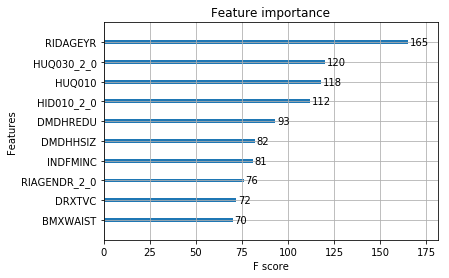

In [211]:
plot_importance(xg_clf_u, max_num_features = 10)

### Downsampling: TomekLinks

#### GridSearch

In [212]:
#xg_class_d = xgb.XGBClassifier(objective ='binary:logistic', random_state = 1, verbose = 1)

In [213]:
#cv_xgd = GridSearchCV(estimator=xg_class_d, param_grid=params, scoring='f1', verbose=2, cv=3)

In [214]:
#cv_xgd.fit(X_tl, y_tl)

In [215]:
#cv_xgd.best_params_
# {'colsample_bytree': 1.0,
#  'learning_rate': 0.1,
#  'max_depth': 2,
#  'n_estimators': 200,
#  'scale_pos_weight': 3,
#  'subsample': 1.0}

In [216]:
#cv_xgd.best_score_
#0.4989002878703359

#### Best Parameter

In [217]:
#cv_xgd.best_estimator_

In [218]:
xg_clf_d = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=None,
       silent=True, subsample=1.0, verbose=1)

#### Predict

In [219]:
xg_clf_d.fit(X_tl, y_tl)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=None,
       silent=True, subsample=1.0, verbose=1)

In [220]:
pred_xgd = xg_clf_d.predict(X_test)

#### Evaluation

In [221]:
#Creating a confusion matrix 
print('Confusion Matrix:')
pd.crosstab(y_true, pred_xgd, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0.0,1.0,All
True,,,
0.0,9784,1237,11021
1.0,843,1053,1896
All,10627,2290,12917


In [222]:
dxg_output = '{} \n Accuracy: {}'
dxg = dxg_output.format(classification_report(y_true, pred_xgd, labels=[0,1]), accuracy_score(y_true, pred_xgd))
print(dxg)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90     11021
           1       0.46      0.56      0.50      1896

   micro avg       0.84      0.84      0.84     12917
   macro avg       0.69      0.72      0.70     12917
weighted avg       0.85      0.84      0.85     12917
 
 Accuracy: 0.8389718974994194


##### Compare with Random Forest

In [223]:
print(d)

              precision    recall  f1-score   support

           0       0.92      0.87      0.90     11021
           1       0.44      0.57      0.50      1896

   micro avg       0.83      0.83      0.83     12917
   macro avg       0.68      0.72      0.70     12917
weighted avg       0.85      0.83      0.84     12917
 
 Accuracy: 0.8299914840907331


#### Feature Importance for XGBoost 

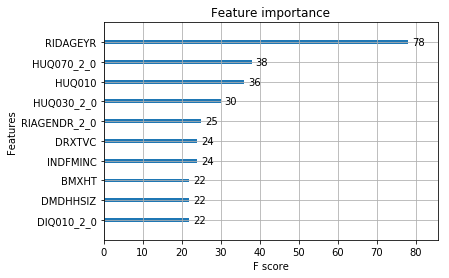

In [224]:
plot_importance(xg_clf_d, max_num_features = 10)

# Important Features: Risk Factors

### Feature Selection: Chi-Square

In [225]:
chi2_fi = featureScores.nlargest(10,'Score')
chi2_fi = chi2_fi.rename(columns={'Specs': 'Label', 'Score': 'Feature_Importance'})
chi2_fi

,Label,Feature_Importance
20,DRXTKCAL,168691.365028
11,DRDTSODI,159794.034875
22,DRXTPHOS,56506.206149
23,DRXTPOTA,37172.846332
26,DRXTVARE,27887.084320
12,DRXTALCO,25780.859763
16,DRXTCHOL,24090.901594
15,DRXTCARB,16484.919535
13,DRXTCAFF,13667.154461
21,DRXTMAGN,9353.174568


### Random Forest

#### Regular:

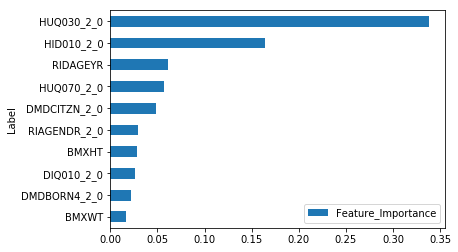

In [226]:
ax_r.figure

In [227]:
rfr_fi = rf_oo_r.copy()
rfr_fi

,Feature_Importance,Label
37,0.338092,HUQ030_2_0
33,0.164627,HID010_2_0
43,0.061299,RIDAGEYR
39,0.057424,HUQ070_2_0
7,0.049013,DMDCITZN_2_0
42,0.029635,RIAGENDR_2_0
1,0.028868,BMXHT
4,0.026534,DIQ010_2_0
6,0.021778,DMDBORN4_2_0
3,0.017159,BMXWT


#### Upsample:

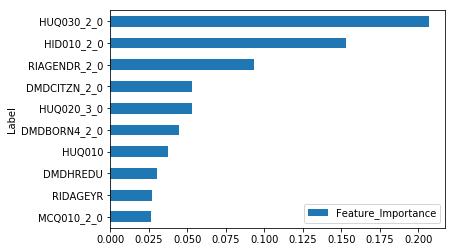

In [228]:
ax_u.figure

In [229]:
rfu_fi = rf_oo_u.copy()
rfu_fi

,Feature_Importance,Label
37,0.207095,HUQ030_2_0
33,0.152870,HID010_2_0
42,0.093710,RIAGENDR_2_0
7,0.053253,DMDCITZN_2_0
36,0.053191,HUQ020_3_0
6,0.044644,DMDBORN4_2_0
34,0.037558,HUQ010
9,0.030154,DMDHREDU
43,0.027170,RIDAGEYR
41,0.026723,MCQ010_2_0


#### Downsample:

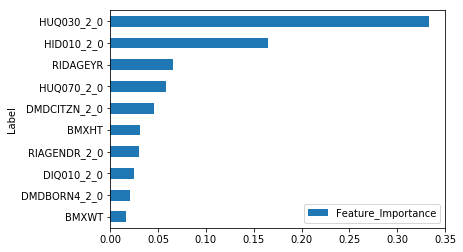

In [230]:
ax_d.figure

In [231]:
rfd_fi = rf_oo_d.copy()
rfd_fi

,Feature_Importance,Label
37,0.333298,HUQ030_2_0
33,0.164886,HID010_2_0
43,0.065286,RIDAGEYR
39,0.057870,HUQ070_2_0
7,0.045443,DMDCITZN_2_0
1,0.030804,BMXHT
42,0.030138,RIAGENDR_2_0
4,0.025308,DIQ010_2_0
6,0.020804,DMDBORN4_2_0
3,0.016916,BMXWT


### XGBoost

#### Regular

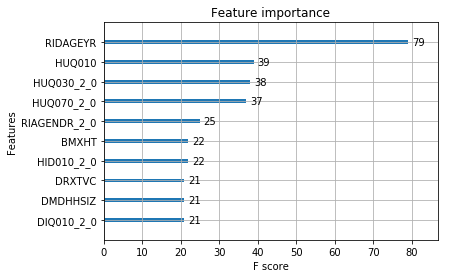

In [232]:
plot_importance(xg_clf_r, max_num_features = 10)

In [233]:
xgr_fs = xg_clf_r.get_booster().get_score(importance_type='weight')
xgr_fs = pd.DataFrame(xgr_fs.items(), columns = ['Label', 'Feature_Importance'])
xgr_fs = xgr_fs.nlargest(10, 'Feature_Importance')
xgr_fs

,Label,Feature_Importance
3,RIDAGEYR,79
11,HUQ010,39
0,HUQ030_2_0,38
2,HUQ070_2_0,37
4,RIAGENDR_2_0,25
1,HID010_2_0,22
9,BMXHT,22
5,DIQ010_2_0,21
7,DMDHHSIZ,21
13,DRXTVC,21


In [234]:
xgr_fi = pd.DataFrame(data = {'Feature_Importance':xg_clf_r.feature_importances_, 'Label':X_train.columns})
xgr_fi = xgr_fi.nlargest(10,'Feature_Importance')
xgr_fi

,Feature_Importance,Label
37,0.319296,HUQ030_2_0
33,0.173108,HID010_2_0
39,0.056764,HUQ070_2_0
4,0.041726,DIQ010_2_0
42,0.037425,RIAGENDR_2_0
36,0.030657,HUQ020_3_0
43,0.030351,RIDAGEYR
41,0.029370,MCQ010_2_0
7,0.029068,DMDCITZN_2_0
8,0.017914,DMDHHSIZ


#### Upsample:

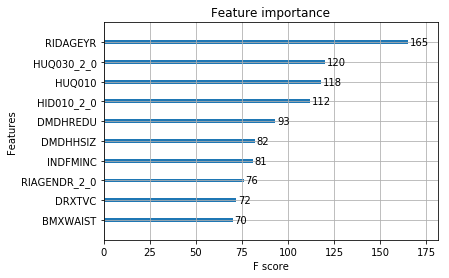

In [235]:
plot_importance(xg_clf_u, max_num_features = 10)

In [236]:
xgu_fs = xg_clf_u.get_booster().get_score(importance_type='weight')
xgu_fs = pd.DataFrame(xgu_fs.items(), columns = ['Label', 'Feature_Importance'])
xgu_fs = xgu_fs.nlargest(10, 'Feature_Importance')
xgu_fs

,Label,Feature_Importance
7,RIDAGEYR,165
0,HUQ030_2_0,120
2,HUQ010,118
1,HID010_2_0,112
13,DMDHREDU,93
3,DMDHHSIZ,82
15,INDFMINC,81
4,RIAGENDR_2_0,76
23,DRXTVC,72
42,BMXWAIST,70


In [237]:
xgu_fi = pd.DataFrame(data = {'Feature_Importance':xg_clf_u.feature_importances_, 'Label':X_sm.columns})
xgu_fi = xgu_fi.nlargest(10,'Feature_Importance')
xgu_fi

,Feature_Importance,Label
37,0.203162,HUQ030_2_0
33,0.113224,HID010_2_0
36,0.101192,HUQ020_3_0
42,0.094201,RIAGENDR_2_0
41,0.079859,MCQ010_2_0
6,0.054160,DMDBORN4_2_0
34,0.051984,HUQ010
48,0.042403,SMD410_2_0
9,0.039069,DMDHREDU
7,0.035290,DMDCITZN_2_0


#### Downsample:

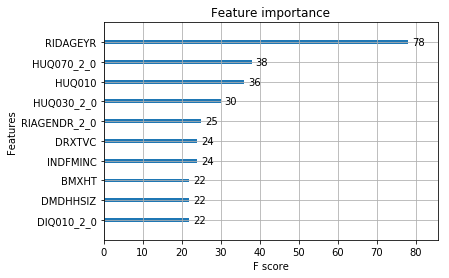

In [238]:
plot_importance(xg_clf_d, max_num_features = 10)

In [239]:
xgd_fs = xg_clf_d.get_booster().get_score(importance_type='weight')
xgd_fs = pd.DataFrame(xgd_fs.items(), columns = ['Label', 'Feature_Importance'])
xgd_fs = xgd_fs.nlargest(10, 'Feature_Importance')
xgd_fs

,Label,Feature_Importance
3,RIDAGEYR,78
2,HUQ070_2_0,38
13,HUQ010,36
0,HUQ030_2_0,30
4,RIAGENDR_2_0,25
8,INDFMINC,24
15,DRXTVC,24
5,DIQ010_2_0,22
7,DMDHHSIZ,22
12,BMXHT,22


In [240]:
xgd_fi = pd.DataFrame(data = {'Feature_Importance':xg_clf_d.feature_importances_, 'Label':X_tl.columns})
xgd_fi = xgd_fi.nlargest(10,'Feature_Importance')
xgd_fi

,Feature_Importance,Label
37,0.357242,HUQ030_2_0
33,0.186500,HID010_2_0
39,0.049206,HUQ070_2_0
4,0.037538,DIQ010_2_0
42,0.033519,RIAGENDR_2_0
43,0.029892,RIDAGEYR
41,0.027036,MCQ010_2_0
36,0.026863,HUQ020_3_0
7,0.022728,DMDCITZN_2_0
8,0.016225,DMDHHSIZ


# Rankings:

Weights for each ranking:

In [307]:
wts = {'chi2_fi': 0.025, 'rf_fi': .15, 'xg_fs': .10, 'xg_fi': .075}

In [308]:
#Suffix names to join on
jl = ['chi2_fi', 'rfr_fi', 'rfu_fi', 'rfd_fi', 'xgr_fs', 'xgu_fs', 'xgd_fs', 'xgr_fi', 'xgu_fi', 'xgd_fi']

In [309]:
#Outer join function
def outerjoin_df(dfs_list):
    n = 1
    df_join = dfs_list[0]
    for d in dfs_list[1:]:
        df_join = df_join.merge(d, how='outer', suffixes=('_'+jl[n-1], '_'+jl[n]), on=['Label'])
        n = n+1
    return df_join

In [310]:
#List of top 10 feature importances
join_list = [chi2_fi, rfr_fi, rfu_fi, rfd_fi, xgr_fs, xgu_fs, xgd_fs, xgr_fi, xgu_fi, xgd_fi]

In [311]:
#Joined list of top 10 feature importances
joined = outerjoin_df(join_list)

In [312]:
joined.head()

,Label,Feature_Importance_chi2_fi,Feature_Importance_rfr_fi,Feature_Importance_rfu_fi,Feature_Importance_rfd_fi,Feature_Importance_xgr_fs,Feature_Importance_xgu_fs,Feature_Importance_xgd_fs,Feature_Importance_xgr_fi,Feature_Importance_xgu_fi,Feature_Importance_xgd_fi
0,DRXTKCAL,168691.365028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DRDTSODI,159794.034875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DRXTPHOS,56506.206149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DRXTPOTA,37172.846332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DRXTVARE,27887.084320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [313]:
#Get the percentage importance of top ten for each feature importance
pct_list = pd.DataFrame()
pct_list['Label'] = joined['Label']
for i, j in enumerate(jl):
    pct_list[j] = joined['Feature_Importance_'+jl[i]]/joined['Feature_Importance_'+jl[i]].sum()   

In [314]:
#Fill in NaNs with 0
pct_list = pct_list.fillna(0)
pct_list.head()

,Label,chi2_fi,rfr_fi,rfu_fi,rfd_fi,xgr_fs,xgu_fs,xgd_fs,xgr_fi,xgu_fi,xgd_fi
0,DRXTKCAL,0.312722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DRDTSODI,0.296228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DRXTPHOS,0.104752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DRXTPOTA,0.068912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DRXTVARE,0.051697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Column for weighted overall risk factor importance ranking

In [315]:
#Weighted overall ranking
pct_list['Importance'] = pct_list[jl[0]] * wts['chi2_fi'] + pct_list[jl[1]] * wts['rf_fi'] + pct_list[jl[2]] * wts['rf_fi'] + pct_list[jl[3]] * wts['rf_fi'] + pct_list[jl[4]] * wts['xg_fs'] + pct_list[jl[5]] * wts['xg_fs'] + pct_list[jl[6]] * wts['xg_fs'] + pct_list[jl[7]] * wts['xg_fi'] + pct_list[jl[8]] * wts['xg_fi'] + pct_list[jl[9]] * wts['xg_fi']

In [316]:
pct_list.head()

,Label,chi2_fi,rfr_fi,rfu_fi,rfd_fi,xgr_fs,xgu_fs,xgd_fs,xgr_fi,xgu_fi,xgd_fi,Importance
0,DRXTKCAL,0.312722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007818
1,DRDTSODI,0.296228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007406
2,DRXTPHOS,0.104752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002619
3,DRXTPOTA,0.068912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001723
4,DRXTVARE,0.051697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001292


## Identified Top 10 Risk Factors:

In [317]:
Risk_Factors = pct_list[['Label','Importance']].copy()

In [318]:
Risk_Factors_10 = Risk_Factors.nlargest(10, 'Importance')
Risk_Factors_10

,Label,Importance
10,HUQ030_2_0,0.287037
11,HID010_2_0,0.157185
12,RIDAGEYR,0.100682
15,RIAGENDR_2_0,0.069364
13,HUQ070_2_0,0.055294
21,HUQ010,0.047689
14,DMDCITZN_2_0,0.037135
17,DIQ010_2_0,0.030792
20,HUQ020_3_0,0.025865
16,BMXHT,0.024917


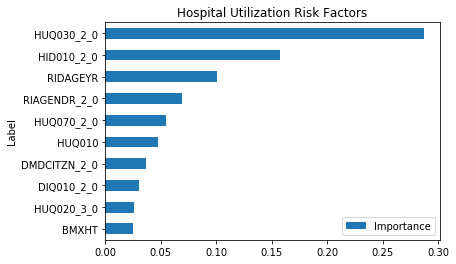

In [319]:
Risk_Factors_10 = Risk_Factors_10.sort_values(by=['Importance'])
Risk_Factors_Plot = Risk_Factors_10.plot.barh(y='Importance', x='Label', title='Hospital Utilization Risk Factors')